In [1]:
#Kütüphaneleri import edelim.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Verimizi içeri aktaralım ve aktarılan bu 
data=pd.read_csv('StudentsPerformance.csv')

In [3]:
#Dataframe içerisindeki ilk 5 satırı inceleyelim.
data.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
##Dataframe içerisindeki son 5 satırı inceleyelim.
data.tail()

gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86

In [5]:
#Dataframe içerisinde rastgele 5 değer seçelim.
data.sample(5)

gender race/ethnicity parental level of education         lunch  \
641  female        group D          associate's degree  free/reduced   
123    male        group D                 high school  free/reduced   
70   female        group D                some college  free/reduced   
75     male        group B          associate's degree  free/reduced   
29   female        group D             master's degree      standard   

    test preparation course  math score  reading score  writing score  
641               completed          74             88             90  
123                    none          63             57             56  
70                completed          58             63             73  
75                     none          44             41             38  
29                     none          62             70             75

In [6]:
#DataFrame'den rasgele olarak %10'luk bir örnekleme yapalım
data.sample(frac=0.1)

gender race/ethnicity parental level of education         lunch  \
562    male        group C           bachelor's degree      standard   
715  female        group B          associate's degree  free/reduced   
933    male        group C           bachelor's degree  free/reduced   
576    male        group A                some college      standard   
376  female        group D            some high school      standard   
..      ...            ...                         ...           ...   
951  female        group D                some college      standard   
770    male        group B                 high school      standard   
656    male        group C          associate's degree  free/reduced   
730  female        group B          associate's degree  free/reduced   
91     male        group C                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
562               completed          96             90             92  
715               completed          76             94             87  
933               completed          70             75             74  
576               completed          61             51             52  
376                    none          80             90             82  
..                      ...         ...            ...            ...  
951               completed          75             77             83  
770                    none          52             48             49  
656                    none          77             67             64  
730               completed          68             77             80  
91                     none          27             34             36  

[100 rows x 8 columns]

In [7]:
#Dataframe ile ilgili temel bilgiler alalım.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#DataFrame'deki tüm satırları ve 0-2 arasındaki (3. sütun hariç) sütunları seçelim ve bu sütunların veri tiplerini ekrana yazdıralım.
data.iloc[:,0:3].dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
dtype: object

In [9]:
# DataFrame'deki sayısal sütunların temel istatistik bilgilerini görelim.
data.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [10]:
#DataFrame'deki tüm sütunların veri tiplerini görelim.
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
#DataFrame'deki sayısal sütunlar arasındaki Pearson korelasyon katsayısını hesaplayalım.
#Pearson korelasyon katsayısı, iki değişken arasındaki doğrusal ilişkinin kuvvetini (-1 ile +1 arasında) gösterir.
data.corr()

math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000

In [12]:
#DataFrame'deki tüm satırlar ve 1. sütundan (2. sütun dahil) son sütuna kadar olan sütunları seçelim.
data.iloc[:,1:].corr()

math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000

In [13]:
#DataFrame'deki herhangi bir hücrenin boş (NaN) değer içerip içermediğini kontrol edelim.
data.isnull().values.any()

False

In [14]:
#DataFrame'deki her sütundaki eksik değerlerin sayısını hesaplayalım ve her sütunun eksik değerlerinin toplam sayısını bulalım.
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
#DataFrame'deki sütunların isimlerini ve numaralarını ekrana yazdıralım.
for i,col in enumerate(data.columns):
    print(i+1,". column is ",col)

1 . column is  gender
2 . column is  race/ethnicity
3 . column is  parental level of education
4 . column is  lunch
5 . column is  test preparation course
6 . column is  math score
7 . column is  reading score
8 . column is  writing score


In [16]:
#DataFrame sütunlarının adlarını değiştirelim.
data.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [17]:
##DataFrame'deki sütunların isimlerini ve numaralarını tekrar ekrana yazdıralım.
for i,col in enumerate(data.columns):
    print(i+1,". column is ",col)

1 . column is  Gender
2 . column is  Race/Ethnicity
3 . column is  Parental_Level_of_Education
4 . column is  Lunch
5 . column is  Test_Preparation_Course
6 . column is  Math_Score
7 . column is  Reading_Score
8 . column is  Writing_Score


In [18]:
#Gender sütunundaki benzersiz değerlerin sayısını ve frekanslarını dönderelim.
data['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [19]:
#Gender sütunundaki benzersiz değerleri dönderelim.
data['Gender'].unique()

array(['female', 'male'], dtype=object)

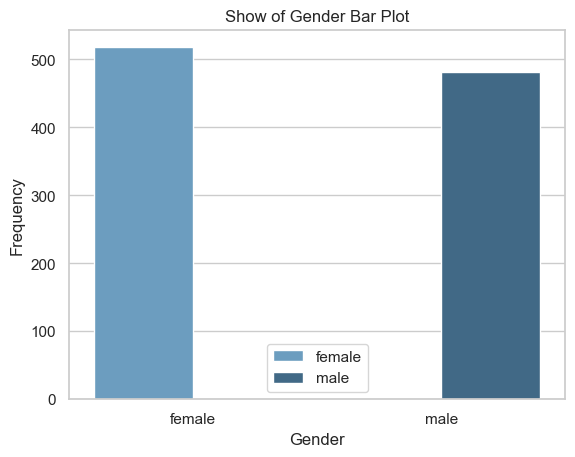

In [20]:
#Gender sütunundaki verilerin frekansını gösteren bir barplot çizelim.
sns.set(style='whitegrid')
ax=sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values,palette="Blues_d",hue=['female','male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


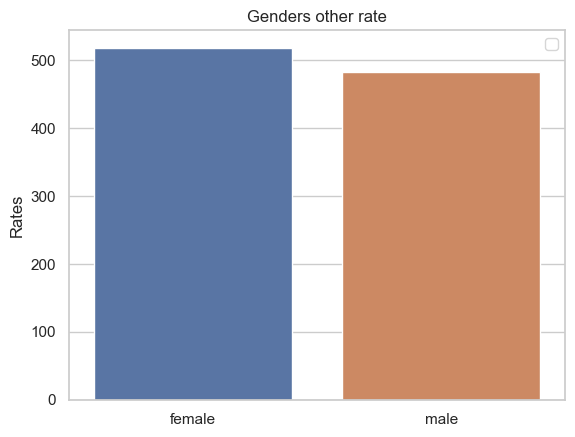

In [21]:
sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values)
plt.title('Genders other rate')
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()

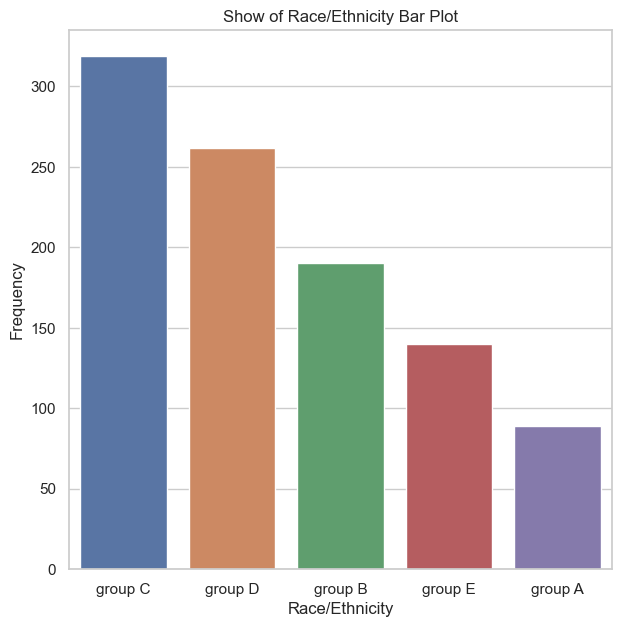

In [22]:
#Race/Ethnicity' sütunundaki verilerin frekansını gösteren bir barplot çizelim.
plt.figure(figsize=(7,7))
sns.barplot(x=data['Race/Ethnicity'].value_counts().index,
              y=data['Race/Ethnicity'].value_counts().values)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Show of Race/Ethnicity Bar Plot')
plt.show()

In [23]:
#Veri setinin ilk 5 satırını tekrar ekrana yazdıralım.
data.head()

Gender Race/Ethnicity Parental_Level_of_Education         Lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  Test_Preparation_Course  Math_Score  Reading_Score  Writing_Score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

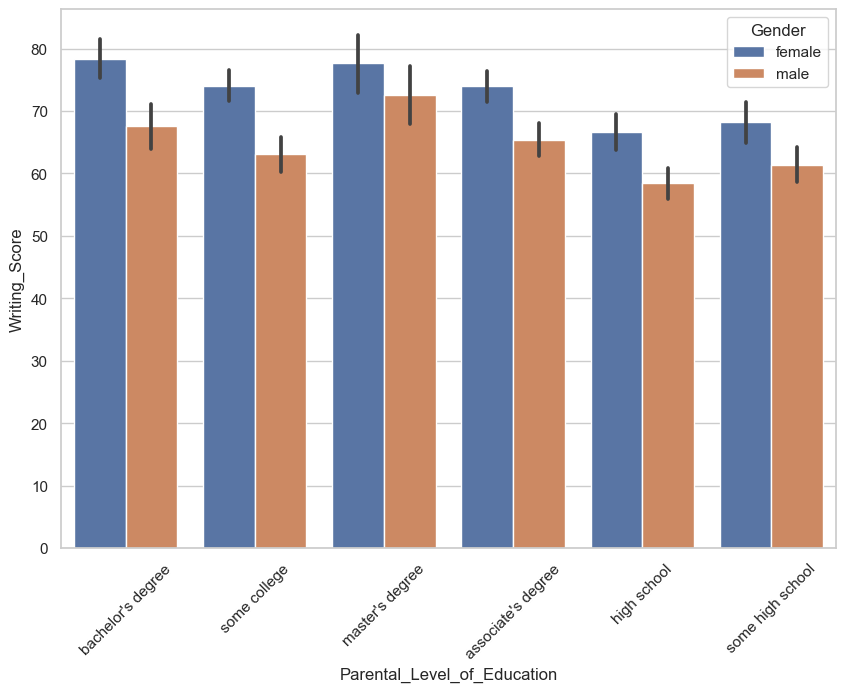

In [24]:
#Parental_Level_of_Education sütunundaki verilerin 'Writing_Score' sütunuyla olan ilişkisini gösteren bir barplot çizelim.
plt.figure(figsize=(10,7))
sns.barplot(x = "Parental_Level_of_Education", y = "Writing_Score", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

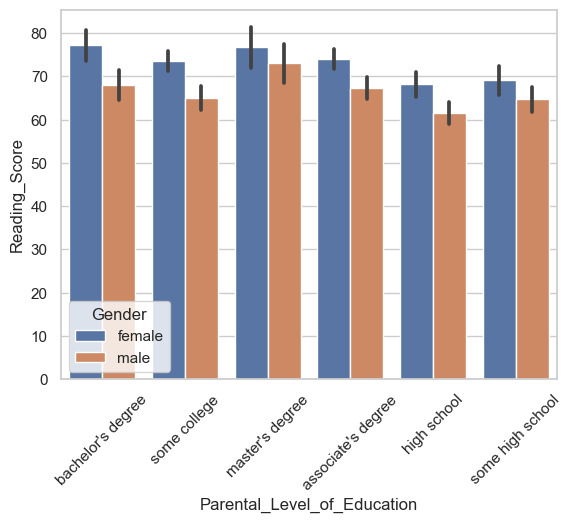

In [25]:
#'Parental_Level_of_Education' sütunundaki verilerin 'Reading_Score' sütunuyla olan ilişkisini gösteren bir barplot çizelim.
sns.barplot(x = "Parental_Level_of_Education", y = "Reading_Score", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

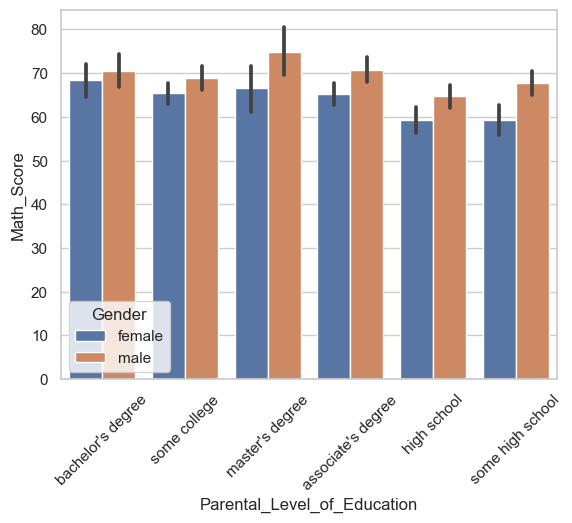

In [26]:
#Parental_Level_of_Education' sütunundaki verilerin 'Math_Score' sütunuyla olan ilişkisini gösteren bir barplot çizelim.
sns.barplot(x = "Parental_Level_of_Education", y = "Math_Score", hue = "Gender", data = data)
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x700 with 0 Axes>

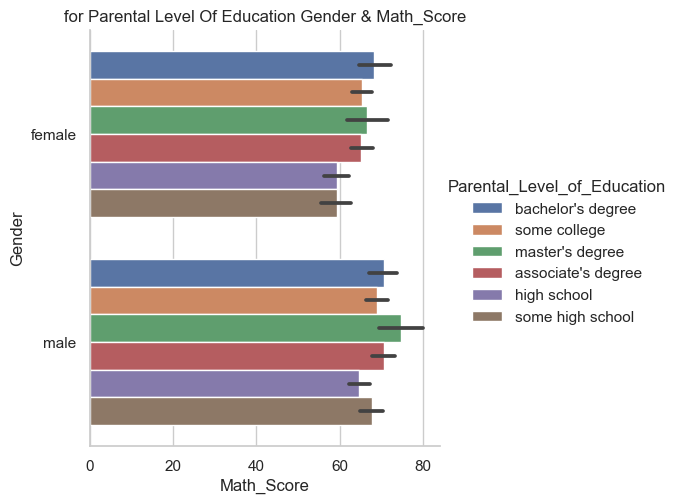

In [27]:
#Parental_Level_of_Education' sütunundaki verilerin 'Math_Score' sütunuyla olan ilişkisini ve 
#bu ilişkiyi 'Gender' özniteliği ile ayırmak için bir kategorik grafik (catplot) çizelim.
plt.figure(figsize=(12,7))
sns.catplot(y="Gender", x="Math_Score",
                 hue="Parental_Level_of_Education",
                 data=data, kind="bar")
plt.title('for Parental Level Of Education Gender & Math_Score')
plt.show()

<Figure size 1000x1000 with 0 Axes>

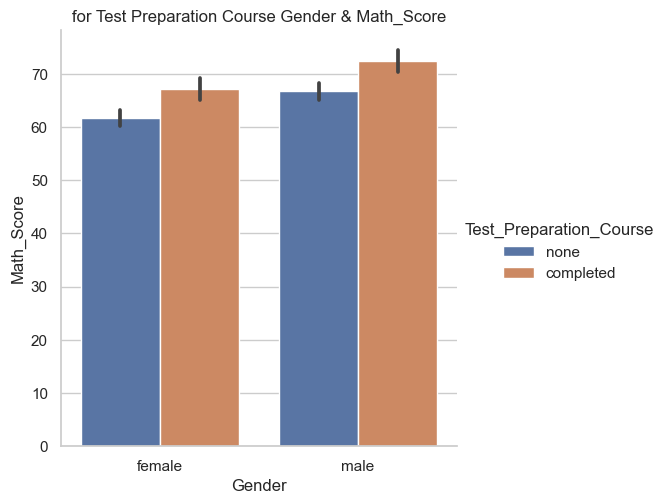

In [28]:
#Test_Preparation_Course' sütunundaki verilerin 'Math_Score' sütunuyla olan ilişkisini ve bu ilişkiyi 'Gender' özniteliği ile 
#ayırmak için bir kategorik grafik (catplot) çizelim.
plt.figure(figsize=(10,10))
sns.catplot(x="Gender", y="Math_Score",
                 hue="Test_Preparation_Course",
                 data=data, kind="bar")
plt.title('for Test Preparation Course Gender & Math_Score')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


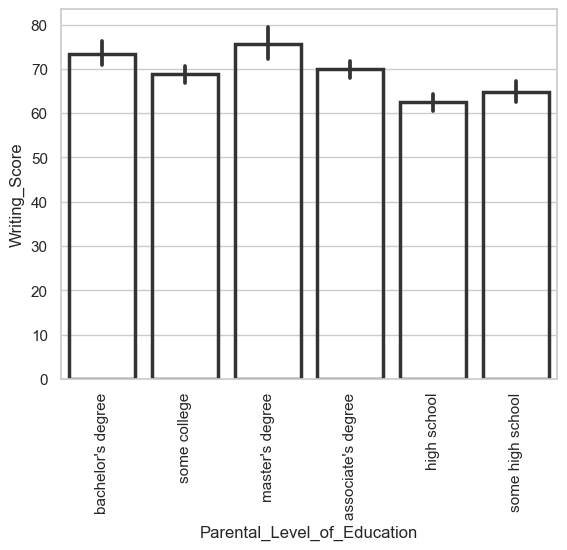

In [29]:
#aile eğitim düzeylerine göre çubuk grafikle görselleştirilmesini sağlayalım.
ax = sns.barplot("Parental_Level_of_Education", "Writing_Score", data=data,
                  linewidth=2.5, facecolor=(1, 1, 1, 0),
                  errcolor=".2", edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

In [30]:
#Veri setinin ilk 5 satırını tekrar ekrana yazdıralım.
data.head()

Gender Race/Ethnicity Parental_Level_of_Education         Lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  Test_Preparation_Course  Math_Score  Reading_Score  Writing_Score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [31]:
#Test_Preparation_Course sütunundaki benzersiz değerleri (unique values) dönderelim.
data['Test_Preparation_Course'].unique()

array(['none', 'completed'], dtype=object)

In [32]:
#Test Preparation Course" sütunu "completed" olan öğrencilerin öğle yemeği durumlarına göre 
#Writing_Score'larının toplamını hesaplayalım.
data_lunch_score=data[data['Test_Preparation_Course']=="completed"].groupby(data['Lunch']).Writing_Score.sum()

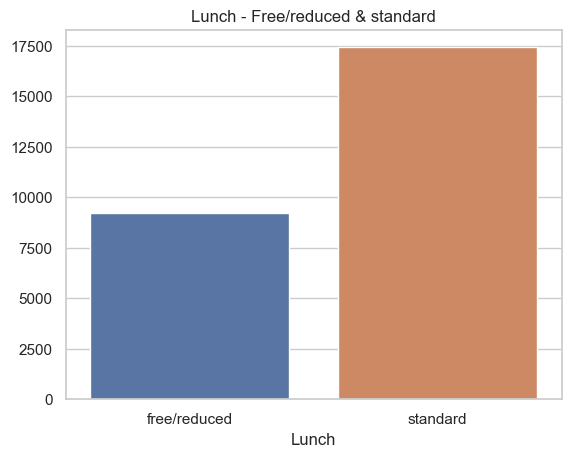

In [33]:
#öğrencilerin öğle yemeği ücretsiz/reduced mı yoksa standard mı aldığına göre 
#Writing_Score'larının toplamını gösteren bir barplot oluşturalım.
plt.title("Lunch - Free/reduced & standard")
sns.barplot(x=data_lunch_score.index,y=data_lunch_score.values)
plt.show()

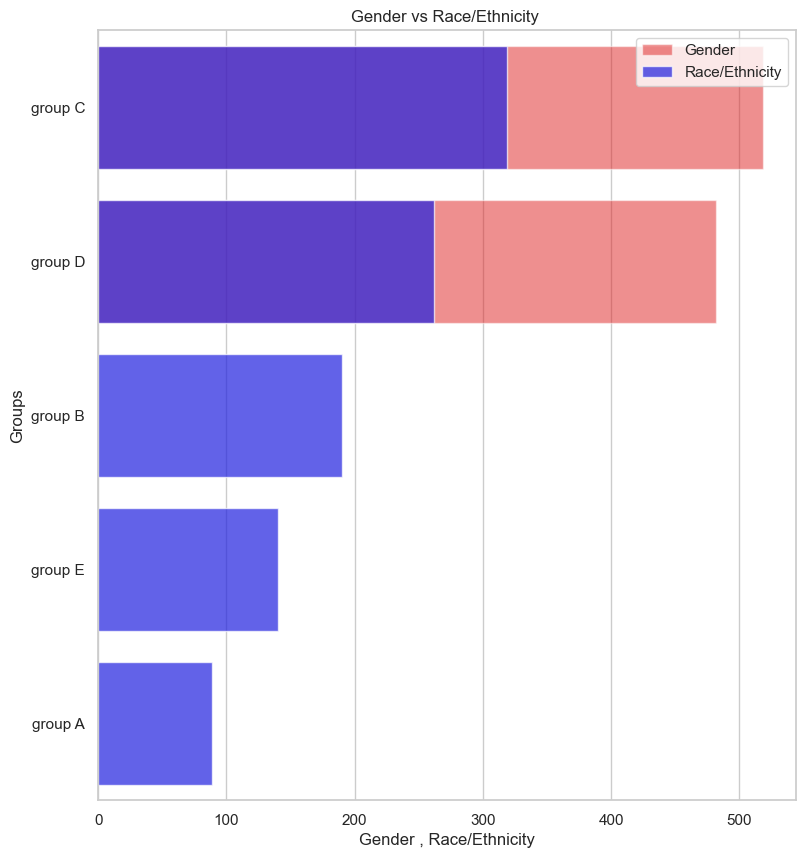

In [34]:
#Gender" ve "Race/Ethnicity" gruplarının frekanslarını barplot ile karşılaştıralım.
f,ax=plt.subplots(figsize=(9,10))
sns.barplot(x=data['Gender'].value_counts().values,y=data['Gender'].value_counts().index,alpha=0.5,color='red',label='Gender')
sns.barplot(x=data['Race/Ethnicity'].value_counts().values,y=data['Race/Ethnicity'].value_counts().index,color='blue',alpha=0.7,label='Race/Ethnicity')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='Gender , Race/Ethnicity',ylabel='Groups',title="Gender vs Race/Ethnicity ")
plt.show()

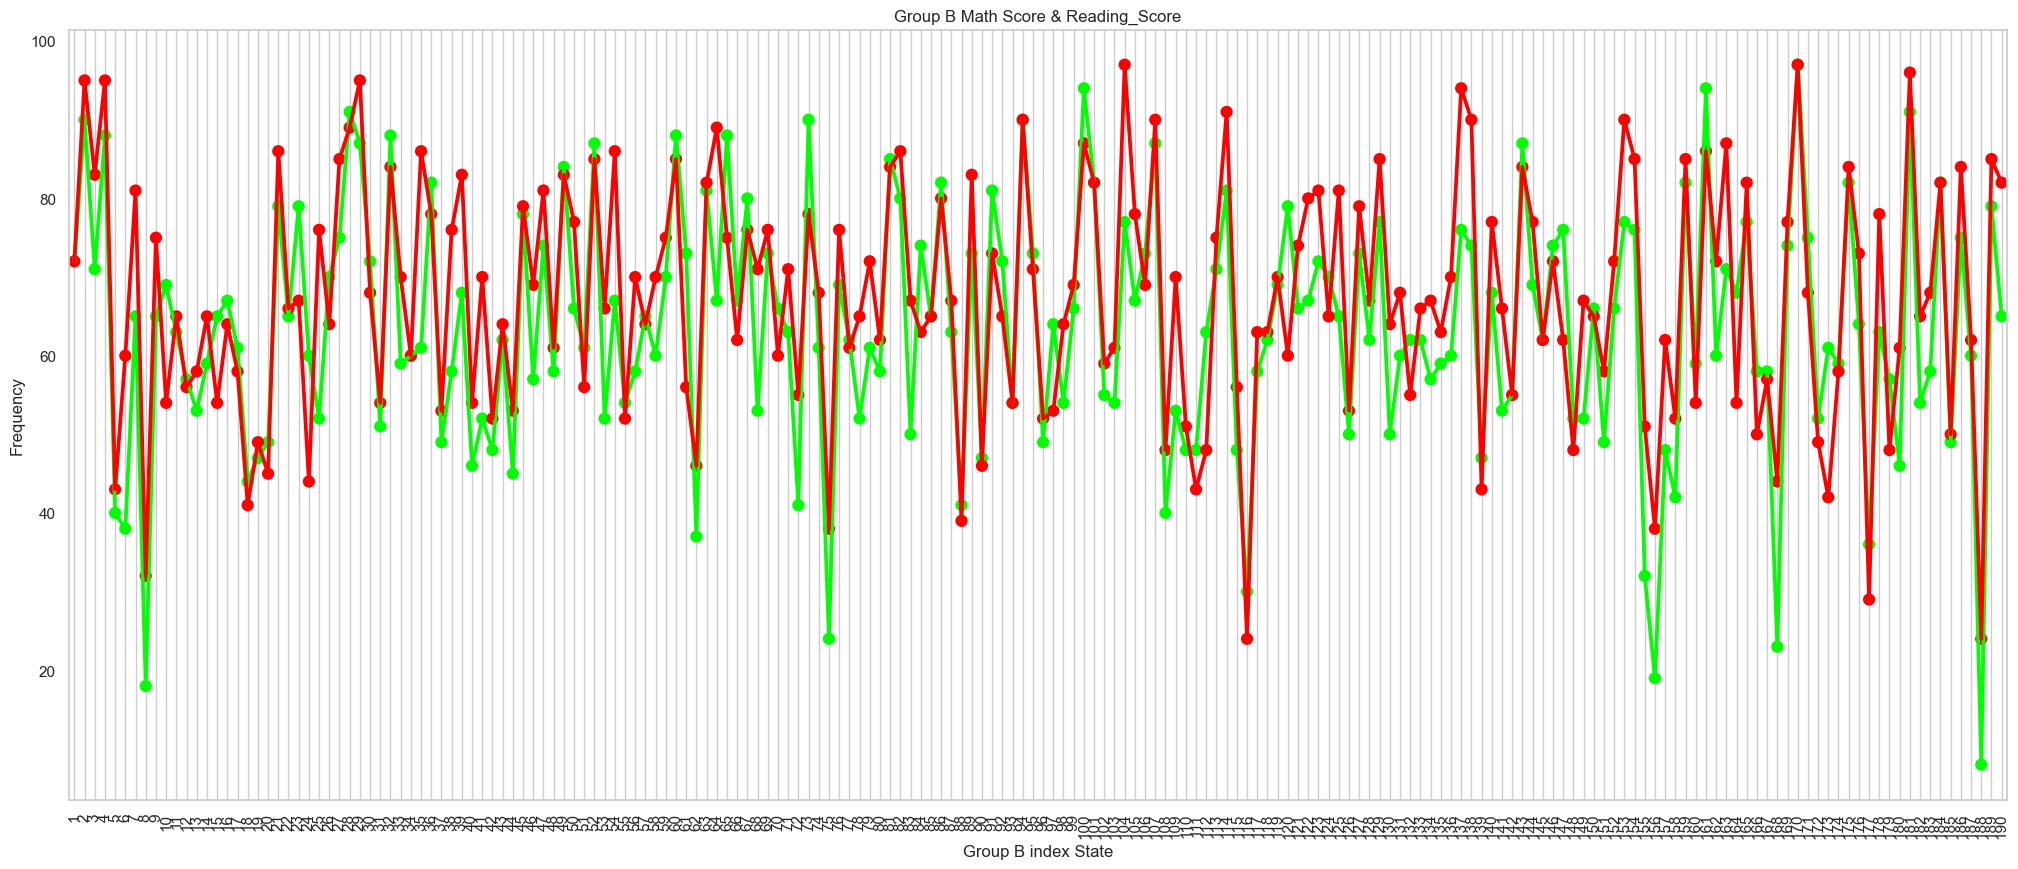

In [35]:
#Öğrencilerin matematik ve okuma notlarına göre grup B'deki öğrencilerin puanlarını gösteren nokta grafiği oluşturalım.
data['Race/Ethnicity'].unique()
len(data[(data['Race/Ethnicity']=='group B')].Math_Score)
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',alpha=0.8)
sns.pointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Reading_Score,color='red',alpha=0.5)
#sns.pointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',alpha=0.8)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Math Score & Reading_Score')
plt.xticks(rotation=90)
plt.grid()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.8666666666666667, 0.5176470588235295, 0.3215686274509804)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


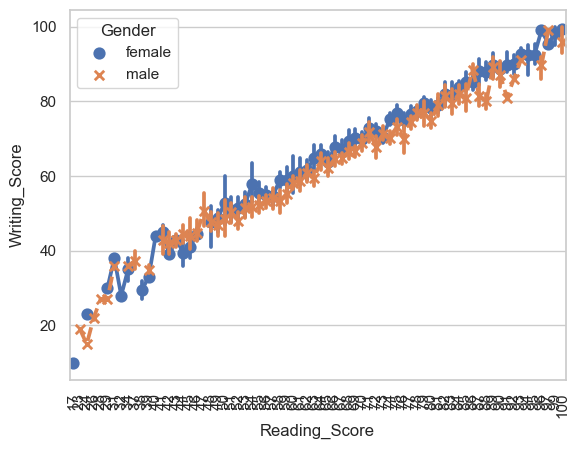

In [37]:
#Reading_Score ve "Writing_Score" değişkenlerini kullanarak "Gender" değişkenine göre nokta grafiği oluşturalım.
ax = sns.pointplot(x="Reading_Score", y="Writing_Score", hue="Gender",data=data,markers=["o", "x"],linestyles=["-", "--"])
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x1000 with 0 Axes>

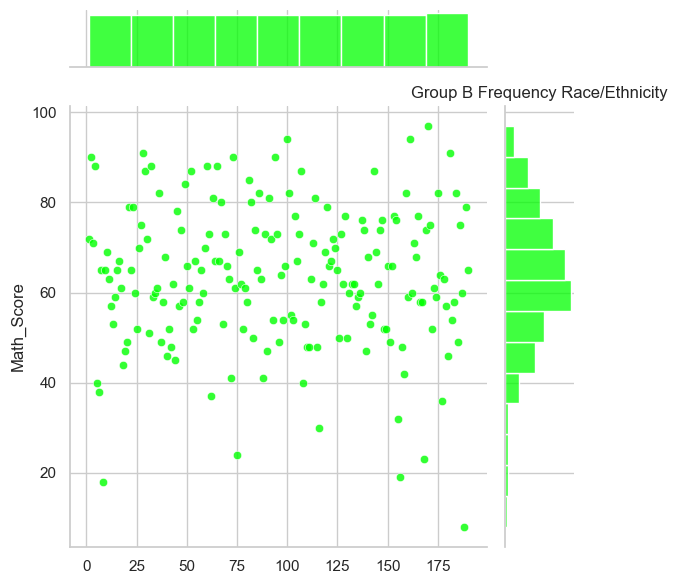

In [38]:
#Race/Ethnicity' sütununda "group B" değeri olan gözlemlerin matematik notlarına göre dağılımını gösteren 
#bir jointplot(Yoğunluk) grafiği oluşturalım.
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',alpha=0.8)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

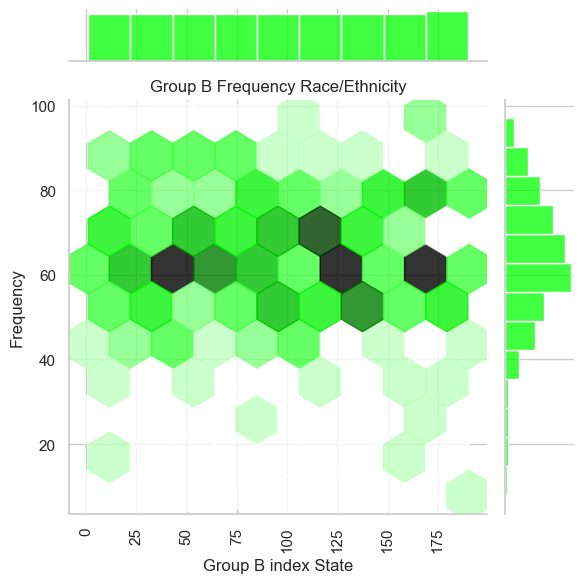

In [39]:
#Race/Ethnicity" sütunu "group B" olan öğrencilerin "Math_Score" değerlerinin frekans dağılımını 6gen hexagonal 
#bölümlerle gösteren bir joint plot oluşturalım.
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',kind='hex',alpha=0.8)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

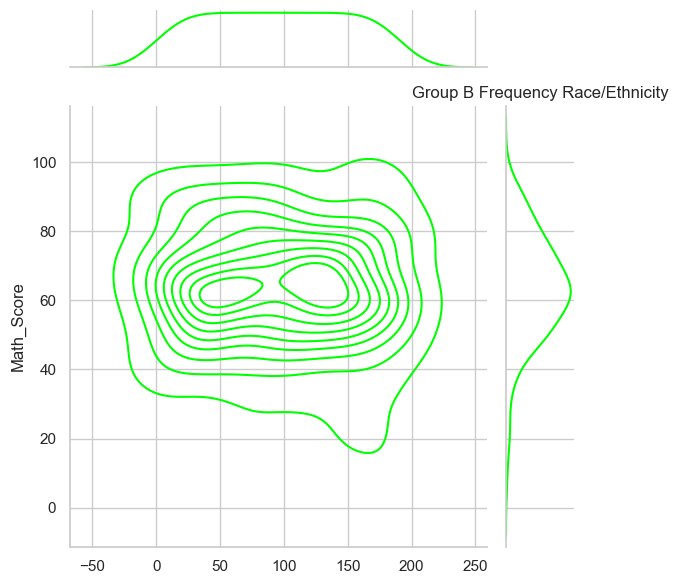

In [40]:
#Race/Ethnicity" değişkeninin "group B" değerine sahip olan öğrencilerin Matematik notlarının dağılımını gösteren bir 
#kernel yoğunluk tahmin grafiği oluşturalım.
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',space=0,kind='kde')
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

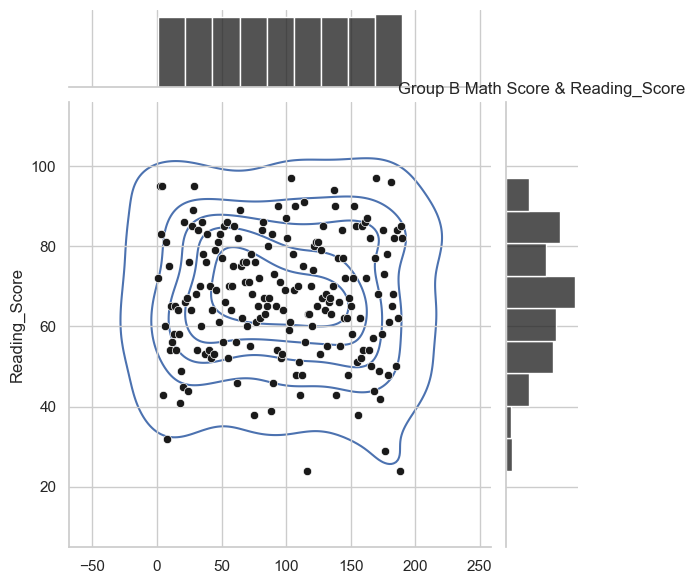

In [41]:
#Race/Ethnicity" sütununda "group B" değeri olan öğrencilerin "Reading_Score" değerlerinin yoğunluk grafiğini çizelim.
data['Race/Ethnicity'].unique()
len(data[(data['Race/Ethnicity']=='group B')].Math_Score)
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Reading_Score,color='k').plot_joint(sns.kdeplot, zorder=0, n_levels=6)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Math Score & Reading_Score')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x1000 with 0 Axes>

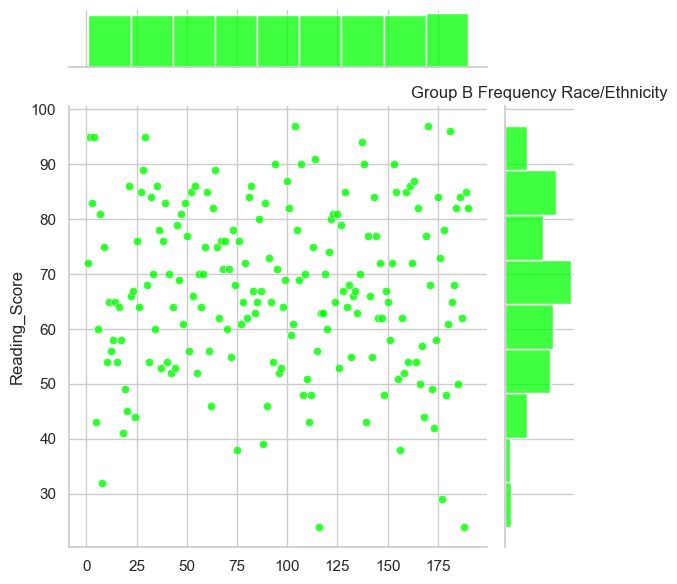

In [42]:
#Race/Ethnicity" özelliği "group B" olan öğrencilerin okuma notlarının, farklı eyalet indekslerindeki dağılımını gösteren bir 
#grafik oluşturalım.
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Reading_Score,color='lime',alpha=0.8)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Frequency Race/Ethnicity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

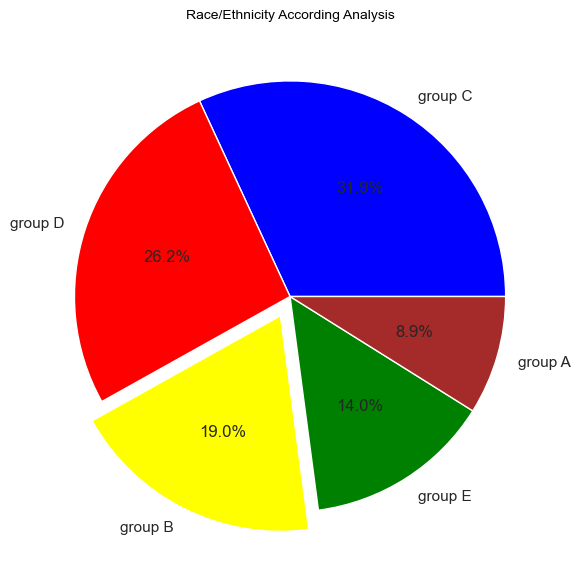

In [43]:
#Race/Ethnicity" değişkenine göre verilerin sayısını hesaplayalım ve bir pasta grafiği ile görselleştirelim.
labels=data['Race/Ethnicity'].value_counts().index
colors=['blue','red','yellow','green','brown']
explode=[0,0,0.1,0,0]
values=data['Race/Ethnicity'].value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

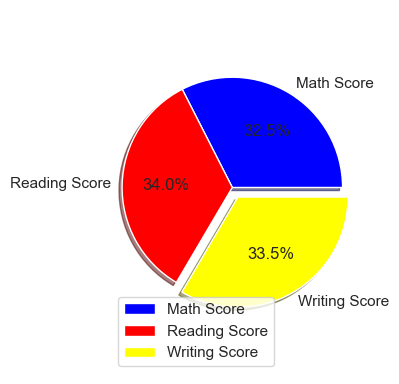

In [44]:
#Okuma ve Yazma puanlarının ortalamalarını hesaplayarak bu puanları bir pasta grafiği olarak gösterelim.
plt.figure(figsize=(4,4))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['blue','red','yellow']
explode=[0,0,0.1]
values=[data.Math_Score.mean(),data.Reading_Score.mean(),data.Writing_Score.mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'] , loc=3)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [45]:
#Race/Ethnicity" özelliğine göre veri kümesindeki her bir etnik gruba karşılık gelen "Reading_Score" sütunundaki 
#ortalama değerleri hesaplayalım.
data.groupby('Race/Ethnicity')['Reading_Score'].mean()

Race/Ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: Reading_Score, dtype: float64

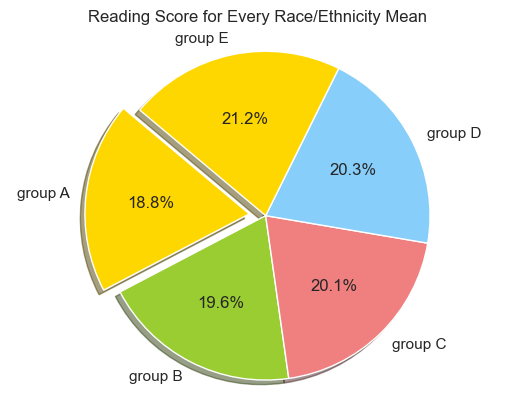

In [46]:
#Her bir etnik grubun ortalama Okuma Puanlarını gösteren bir pasta dilimi grafiği oluşturalım.
labels = 'group A', 'group B', 'group C', 'group D','group E'
sizes = data.groupby('Race/Ethnicity')['Reading_Score'].mean().values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Reading Score for Every Race/Ethnicity Mean')
plt.axis('equal')
plt.show()

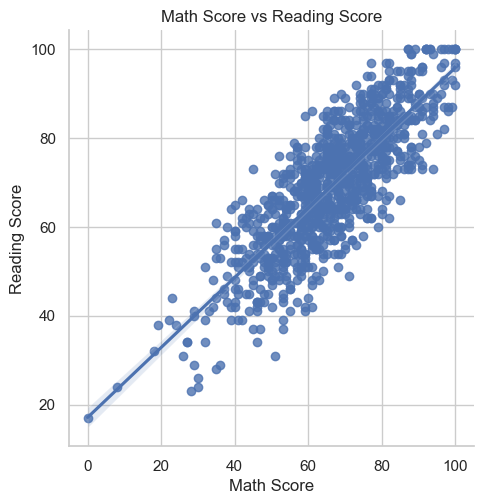

In [47]:
#veri setindeki Math_Score ve Reading_Score arasındaki ilişkiyi görselleştiren bir scatterplot (dağılım grafiği) çizelim
#ve bu iki değişken arasındaki ilişkiyi temsil etmek için bir doğru (regresyon çizgisi) ekleyelim.
sns.lmplot(x='Math_Score',y='Reading_Score',data=data)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Math Score vs Reading Score')
plt.show()

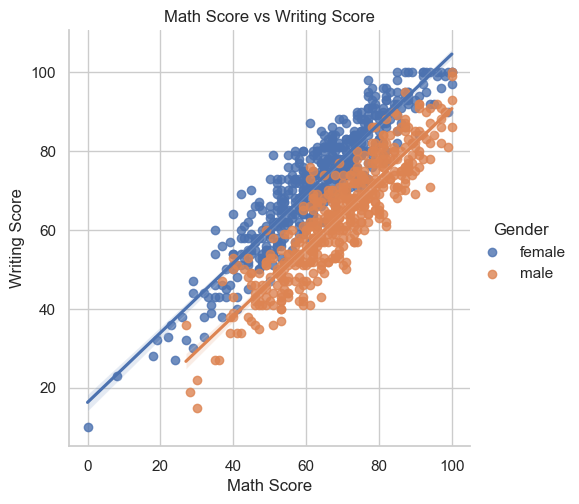

In [48]:
#veri kümesindeki Math_Score ve Writing_Score değişkenleri arasındaki ilişkiyi görselleştirelim.
sns.lmplot(x='Math_Score',y='Writing_Score',hue='Gender',data=data)
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

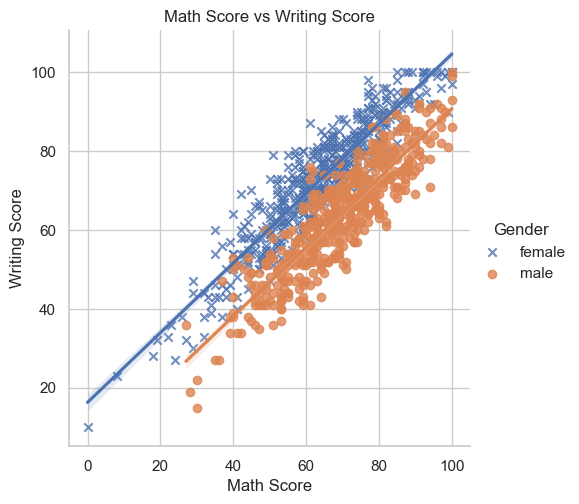

In [49]:
#veri setindeki Math_Score ve Writing_Score sütunları arasındaki ilişkiyi görselleştirelim.
sns.lmplot(x='Math_Score',y='Writing_Score',hue='Gender',data=data,markers=['x','o'])
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

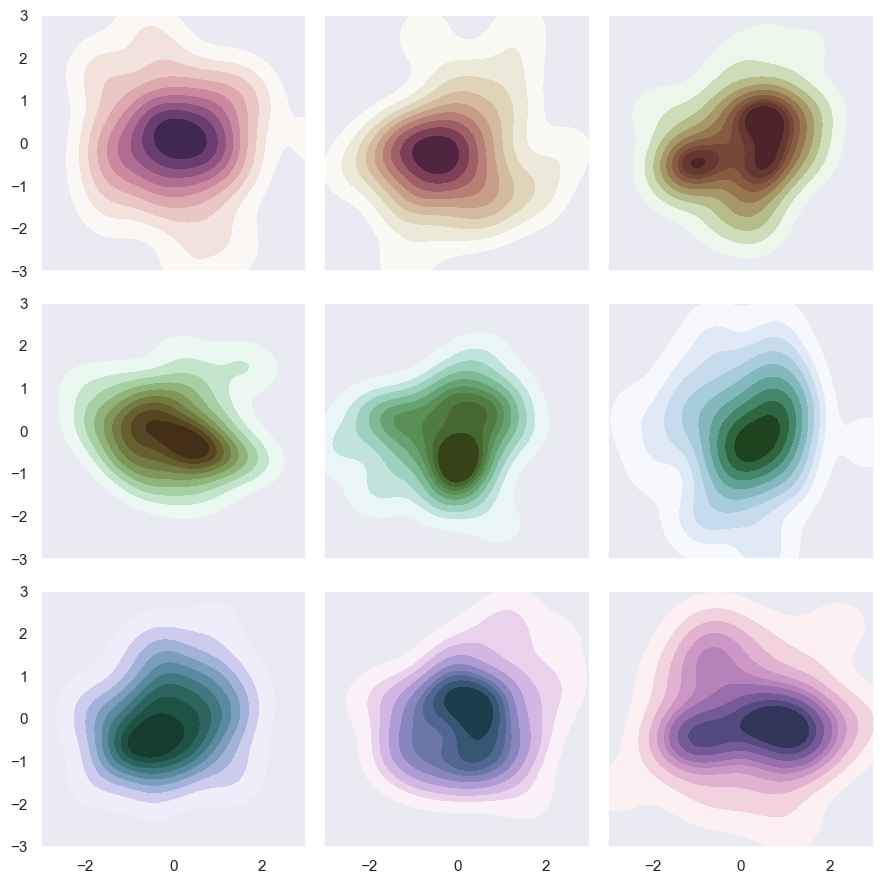

In [50]:
#cubehelix_palette fonksiyonu ile oluşturulan bir renk paleti kullanarak, rastgele bir bivariate veri kümesi oluşturarak, 
#her bir alt grafikteki kernel density estimate (KDE) grafiğini çizelim
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()
plt.show()

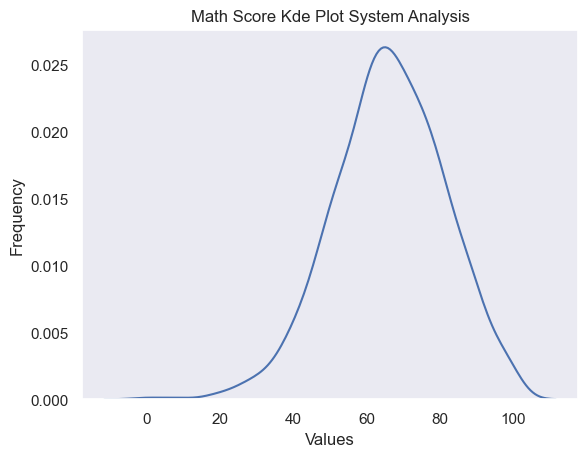

In [51]:
#veri setindeki Matematik Notu (Math_Score) sütununun yoğunluk grafiğini (KDE plot) çizelim
sns.kdeplot(data['Math_Score'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Math Score Kde Plot System Analysis')
plt.show()

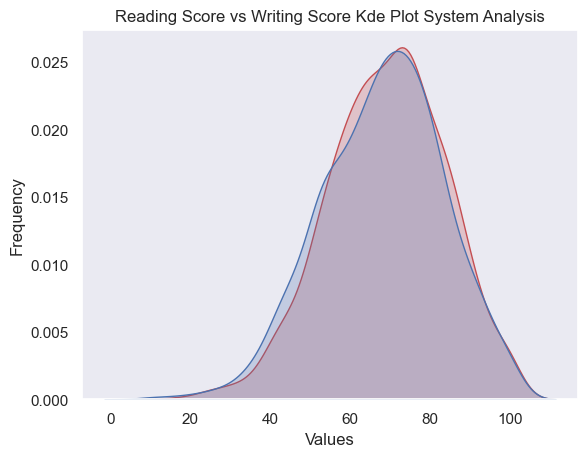

In [52]:
#okuma ve yazma notlarındaki yoğunluğunun karşılaştırılması için iki çekirdek yoğunluk tahmin grafiği (KDE) çizelim.
sns.kdeplot(data['Reading_Score'],shade=True,color='r')
sns.kdeplot(data['Writing_Score'],shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Reading Score vs Writing Score Kde Plot System Analysis')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


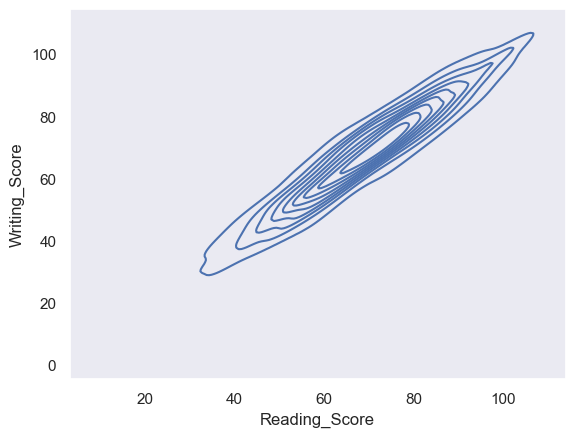

In [53]:
#Reading_Score' ve 'Writing_Score' değişkenleri arasındaki ilişkiyi görselleştirmek için bir çekirdek yoğunluk tahmini (KDE)
#çizimi oluşturalım.
sns.kdeplot(data['Reading_Score'],data['Writing_Score'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


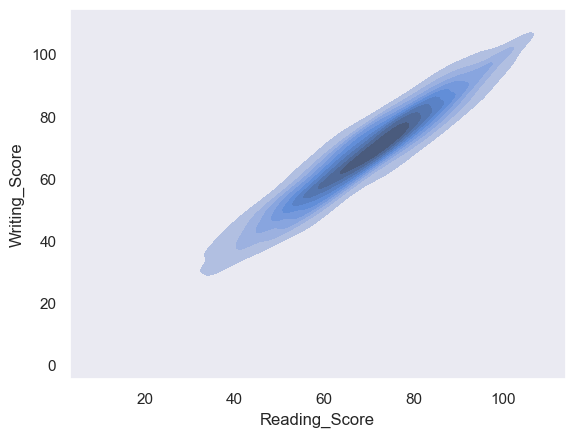

In [54]:
#Reading_Score" ve "Writing_Score" sütunları arasındaki ilişkiyi gösteren, bu iki sütunu içeren bivariate bir yoğunluk grafiği
#(KDE plot) çizelim.
sns.kdeplot(data['Reading_Score'],data['Writing_Score'],shade=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.15 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


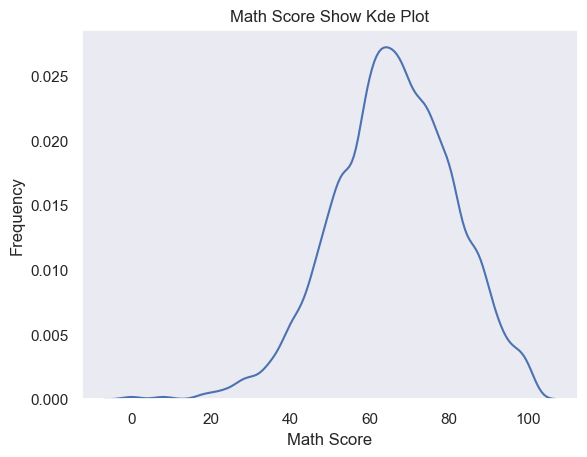

In [55]:
#veri kümesindeki 'Math_Score' sütununa dayalı bir yoğunluk kesit grafiği oluşturalım. 
#bw (bandwidth) parametresi ile yoğunluk grafiğinin pürüzsüzlüğünü kontrol edelim.
sns.kdeplot(data['Math_Score'],bw=.15)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Show Kde Plot')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in fav

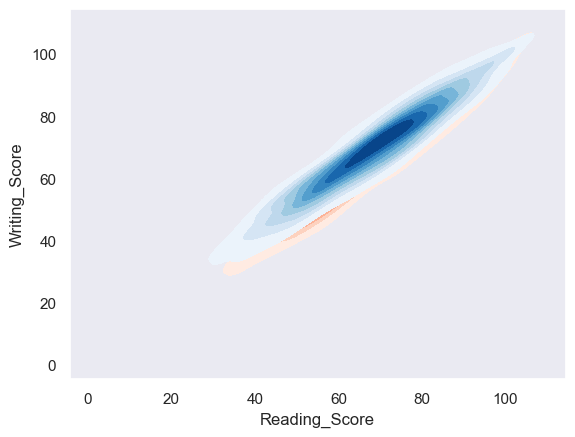

In [56]:
#data veri çerçevesindeki Reading_Score ve Writing_Score sütunlarından elde edilen verilerin yoğunluklarını gösterelim.
sns.kdeplot(data['Reading_Score'],data['Writing_Score'],cmap='Reds',shade=True,shade_lowest=False)
sns.kdeplot(data['Writing_Score'],data['Reading_Score'],cmap='Blues',shade=True,shade_lowest=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


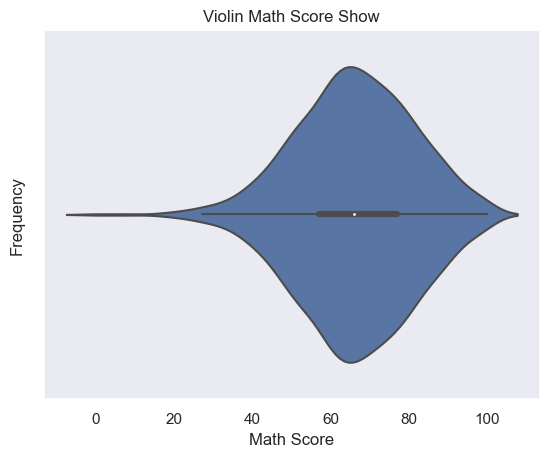

In [57]:
#öğrencilerin matematik puanlarının dağılımını görselleştirmek için bir violin plot çizerek görselleştirelim.
sns.violinplot(data['Math_Score'])
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Violin Math Score Show')
plt.show()

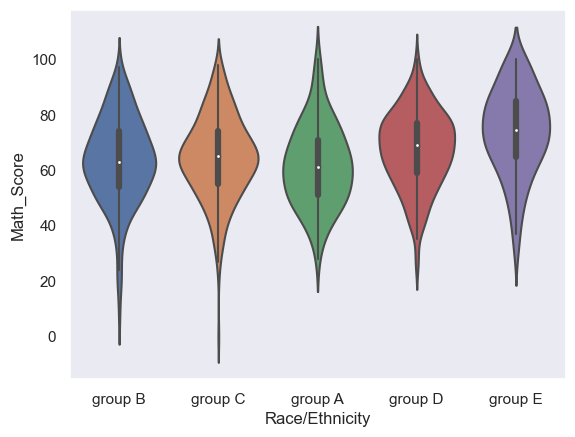

In [58]:
#öğrencilerin ırk/etnik kökenlerine göre matematik notlarının dağılımını gösteren bir keman grafiği çizdirelim.
sns.violinplot(x=data['Race/Ethnicity'],y=data['Math_Score'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


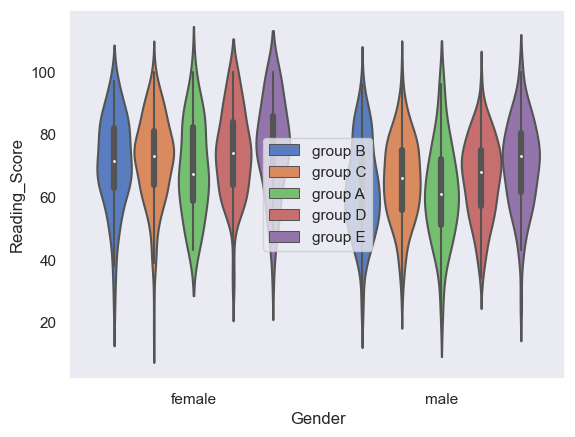

In [59]:
#Öğrencilerin okuma notlarına göre cinsiyetlerinin ve etnik kökenlerinin dağılımını gösteren bir violin grafiği oluşturalım.
sns.violinplot(data['Gender'],y=data['Reading_Score'],hue=data['Race/Ethnicity'],palette='muted')
plt.legend(loc=10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


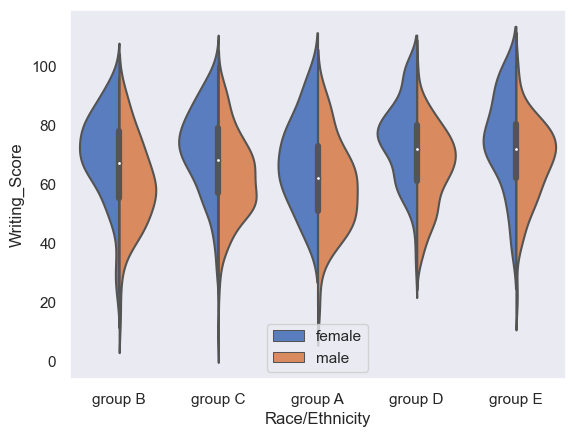

In [60]:
#Yarım daire şeklinde verilerin dağılımını görselleştiren violinplot grafiğini çizelim. 
#Veri setindeki "Race/Ethnicity" sütununa göre her bir etnik gruptaki öğrencilerin "Writing_Score" notlarının dağılımını
#cinsiyete göre ayırarak gösterelim.
sns.violinplot(data['Race/Ethnicity'],data['Writing_Score'],
               hue=data['Gender'],palette='muted',split=True)
plt.legend(loc=8)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


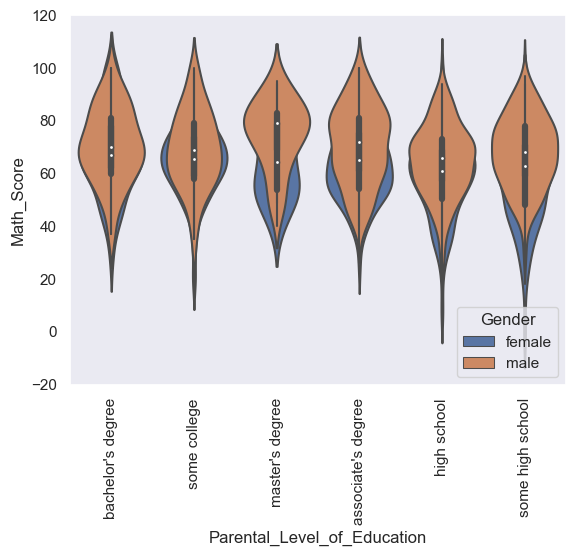

In [61]:
#Eğitim seviyesi ile matematik puanı arasındaki ilişkiyi gösteren bir violinplot grafiği çizelim.
sns.violinplot(data['Parental_Level_of_Education'],data['Math_Score'],hue=data['Gender'],dodge=False)
plt.xticks(rotation=90)
plt.show()

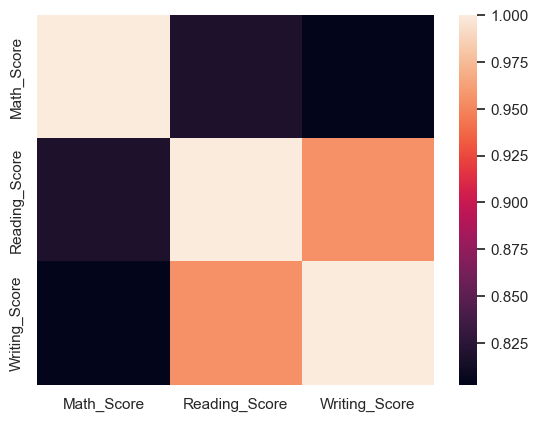

In [62]:
#Veri kümesindeki sütunların birbirleriyle olan ilişkilerini görselleştiren bir ısı haritası oluşturalım. 
#Burada, her sütunun diğer sütunlarla nasıl ilişkili olduğunu renk kodları kullanarak göstereceğiz. 
#Pozitif bir ilişki, koyu renklerle temsil edilirken, negatif bir ilişki daha açık renklerle temsil edeceğiz.
sns.heatmap(data.corr())
plt.show()

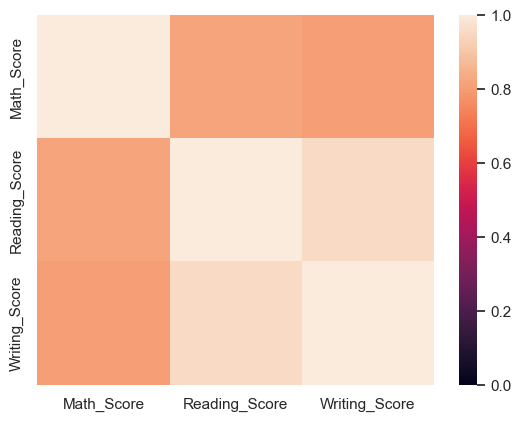

In [63]:
#Yalnızca pozitif korelasyonları gösteren bir ısı haritası oluşturalım.
sns.heatmap(data.corr(),vmin=0,vmax=1)
plt.show()

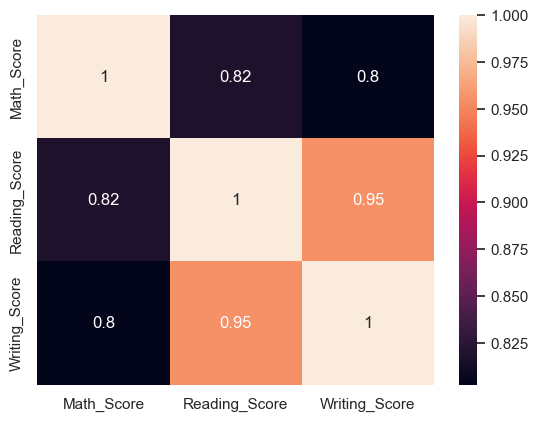

In [64]:
#Veri setindeki değişkenler arasındaki korelasyonu görselleştirelim.
sns.heatmap(data.corr(),annot=True)
plt.show()

C:\Users\skru_\AppData\Local\Temp\ipykernel_22204\82369106.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

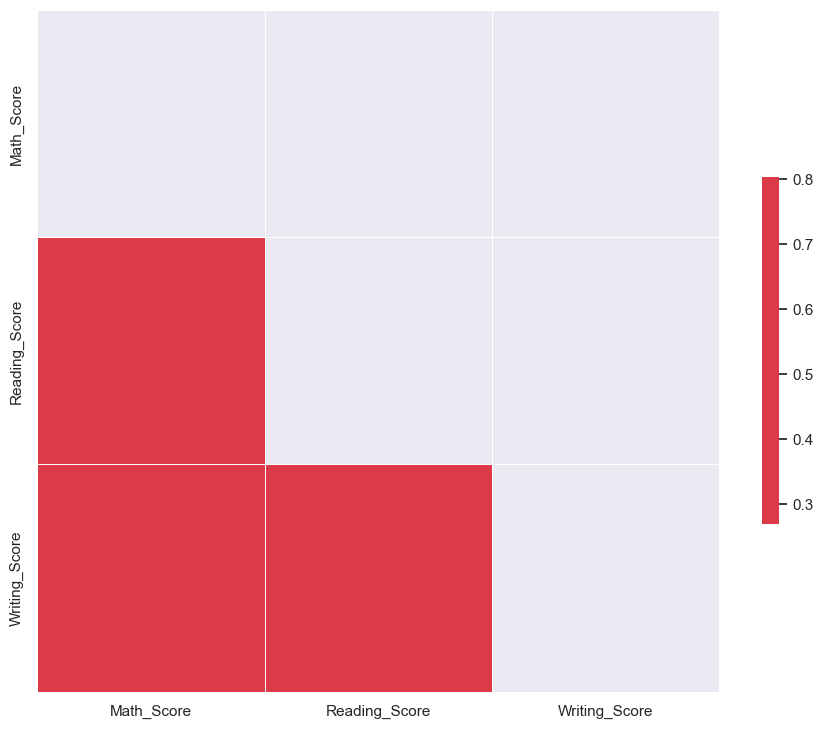

In [65]:
#Veri setindeki değişkenlerin birbirleriyle olan korelasyonunu görselleştiren bir ısı haritası çizelim. 
#Üst üçgen maskesi, yalnızca alt üçgen bölümündeki korelasyonları göstermek için kullanacağız.
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

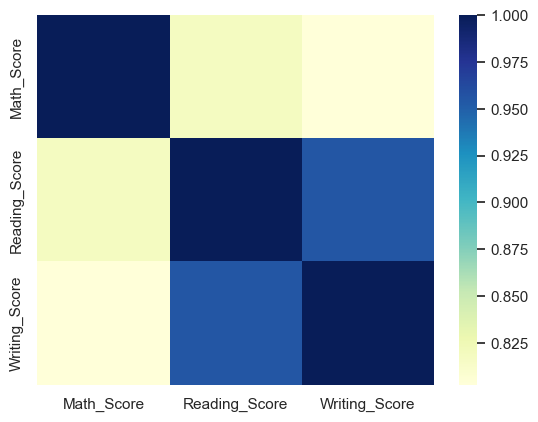

In [66]:
#Veri setindeki sütunlar arasındaki korelasyonları gösteren bir ısı haritası oluşturalım. 
#Renkler, korelasyonun gücünü gösterir. Renkler daha açık ise, sütunlar arasındaki korelasyon daha güçlüdür. 
#Burada, mavi-yeşil renk paleti olan "YlGnBu" kullanarak ısı haritasını çizdirelim.
sns.heatmap(data.corr(),cmap='YlGnBu')
plt.show()

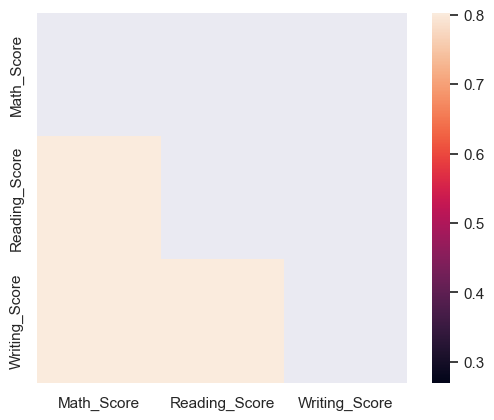

In [67]:
#Beyaz bir arka plana sahip ısı haritası çizelim.
sns.axes_style("white")
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(),vmax=.3,mask=mask,square=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


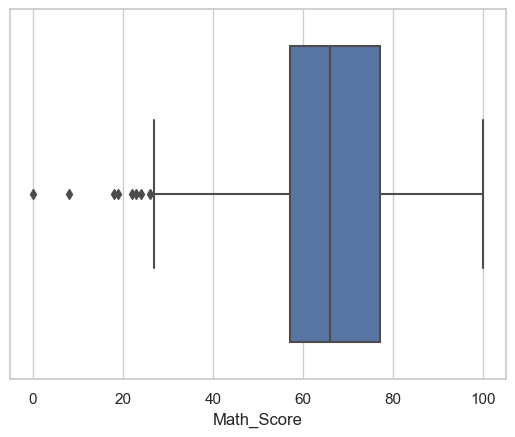

In [68]:
#Veri setindeki 'Math_Score' sütununun kutu grafiğini oluşturalım.
sns.set(style='whitegrid')
sns.boxplot(data['Math_Score'])
plt.show()

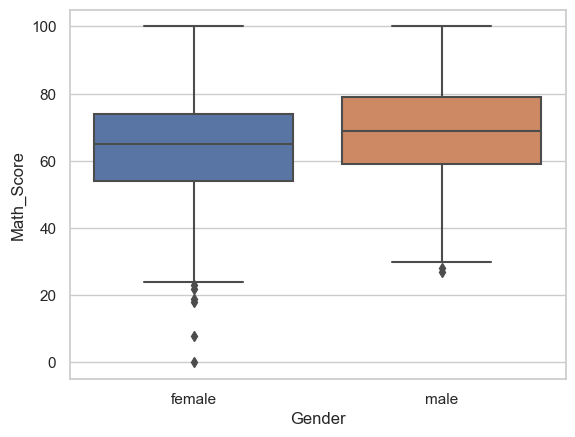

In [69]:
#Öğrencilerin cinsiyetlerine göre Matematik puanlarının kutu grafiğini çizelim.
sns.boxplot(x=data['Gender'],y=data['Math_Score'])
plt.show()

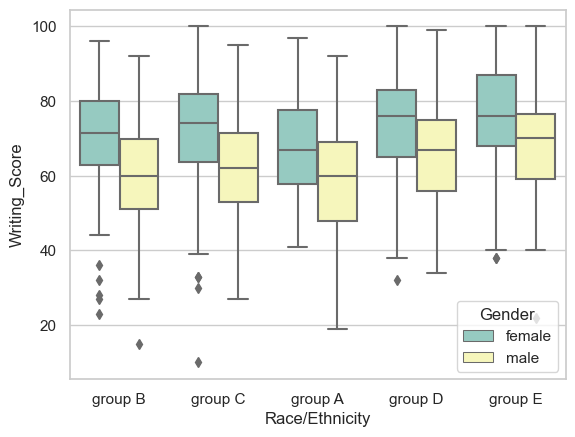

In [70]:
#Cinsiyete ve etnik kökene göre öğrencilerin yazma notlarına ilişkin kutu grafiğini çizelim. 
#Etnik kök ile cinsiyet arasındaki ilişkiyi renklendirir ve farklı etnik kökler arasındaki karşılaştırmayı kolaylaştırmak için 
#farklı bir palet kullanalım.
sns.boxplot(x=data['Race/Ethnicity'],y=data['Writing_Score'],hue=data['Gender'],palette="Set3")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


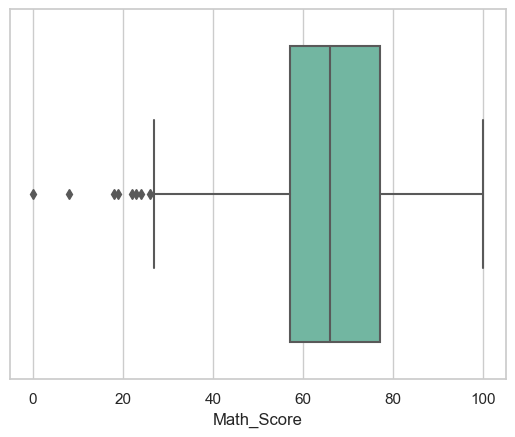

In [71]:
#Data veri setindeki Math_Score değişkeninin kutu grafiğini yatay olarak (horizontal) çizelim.
sns.boxplot(data['Math_Score'],orient='h',palette='Set2')
plt.show()

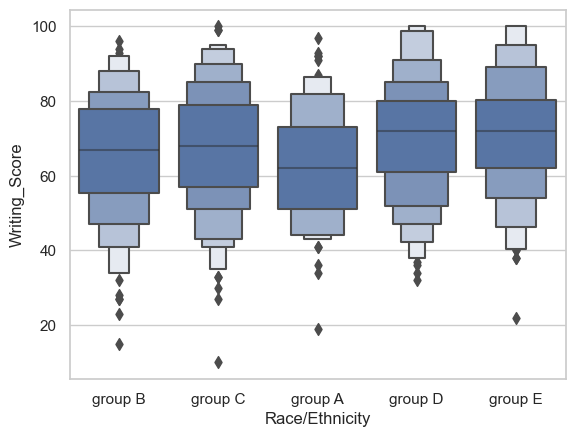

In [72]:
#Yazarlık puanına göre etnik kökene göre gruplandırılmış verilerin kutu plotunu çizelim.
sns.boxenplot(x="Race/Ethnicity", y="Writing_Score",
              color="b",
              scale="linear", data=data)
plt.show()

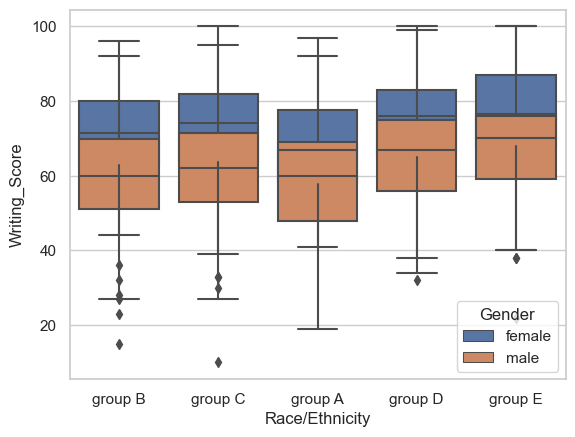

In [73]:
#Race/Ethnicity sütununu x ekseninde, "Writing_Score" sütununu y ekseninde göstererek, 
#her bir etnik kökenden gelen öğrencilerin yazma skorlarını kutu grafiği olarak gösterelim.
sns.boxplot(x=data['Race/Ethnicity'],y=data['Writing_Score'],hue=data['Gender'],dodge=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


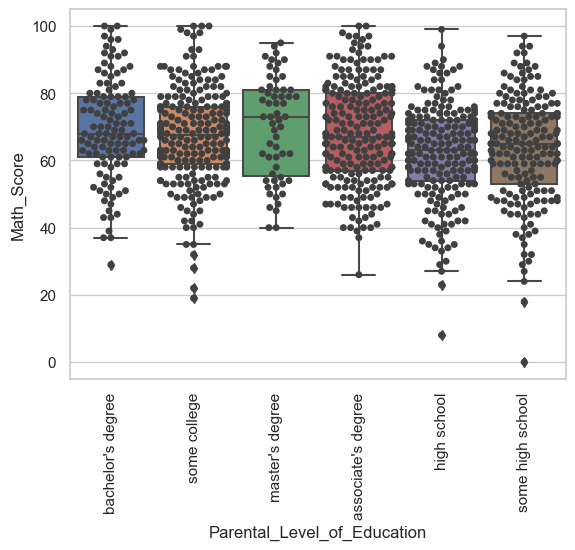

In [74]:
#Eğitim seviyeleri ve matematik skorları arasındaki ilişkiyi kutu grafiği ve nokta grafiği (swarm plot) ile görselleştirelim. 
#X ekseni eğitim seviyelerini, y ekseni ise matematik skorlarını göstersin.
sns.boxplot(x=data['Parental_Level_of_Education'],y=data['Math_Score'])
plt.xticks(rotation=90)
sns.swarmplot(x=data['Parental_Level_of_Education'],y=data['Math_Score'],color=".25")
plt.xticks(rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


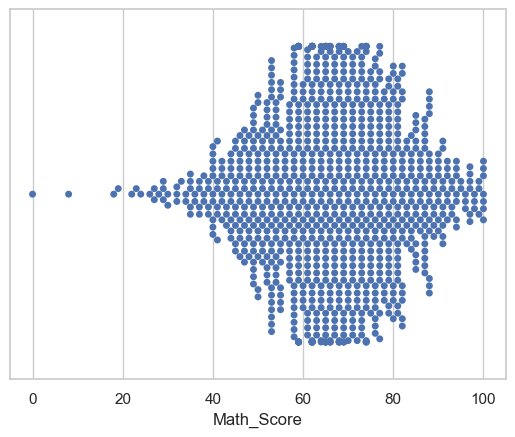

In [75]:
#Öğrencilerin matematik notlarını bir yüzme grafiği kullanarak gösterelim.
sns.set(style='whitegrid')
sns.swarmplot(x=data['Math_Score'])
plt.show()

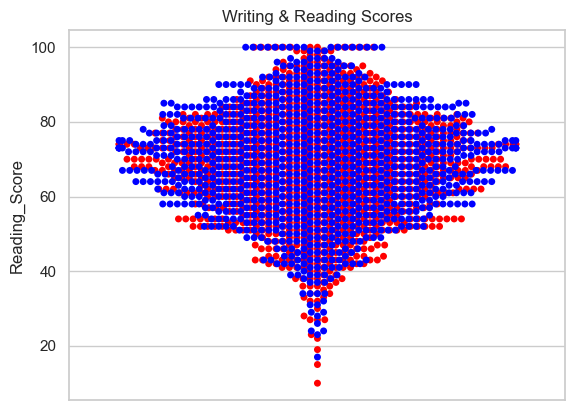

In [76]:
#"Writing_Score" ve "Reading_Score" verilerini, her bir verinin sahip olduğu değerleri yatay eksen üzerinde serpiştirerek
#gösteren bir swarmplot oluşturalım.
sns.set(style="whitegrid")

sns.swarmplot(y=data["Writing_Score"],color='red')
sns.swarmplot(y=data["Reading_Score"],color='blue')
plt.title('Writing & Reading Scores')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


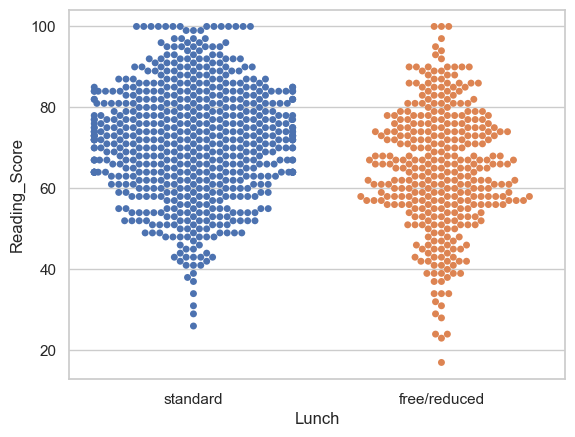

In [77]:
#Öğrencilerin yemek durumuna göre okuma notlarının bir yayılımını gösteren bir arı sürüsü çizimini gösterelim. 
#x ekseninde yemek durumu, y ekseninde okuma notları olsun.
sns.swarmplot(x=data['Lunch'],y=data['Reading_Score'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


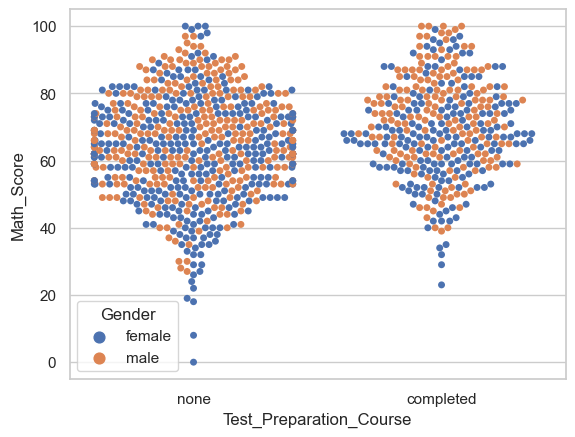

In [78]:
#Öğrencilerin test hazırlık kursuna katılıp katılmadığına ve cinsiyetine göre matematik puanlarının dağılımını gösteren
#bir swarm plot grafiği oluşturalım.
sns.swarmplot(x=data['Test_Preparation_Course'],y=data['Math_Score'],hue=data['Gender'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.2% of the points

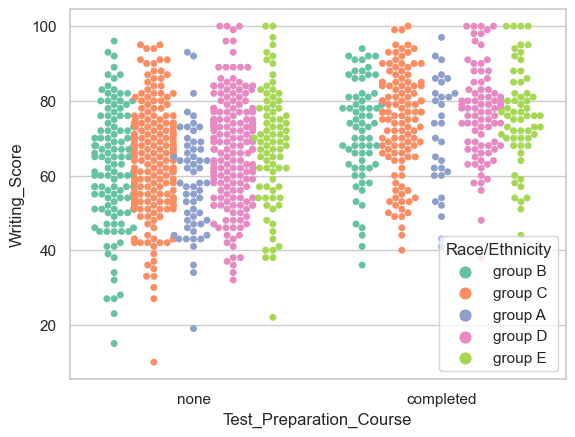

In [79]:
#Öğrencilerin test hazırlık kursuna katılıp katılmadığına ve etnik kökenlerine göre yazma puanlarının dağılımını gösteren
#bir swarm plot grafiği oluşturalım.
sns.swarmplot(x=data['Test_Preparation_Course'],y=data['Writing_Score'],hue=data['Race/Ethnicity'],palette='Set2',dodge=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


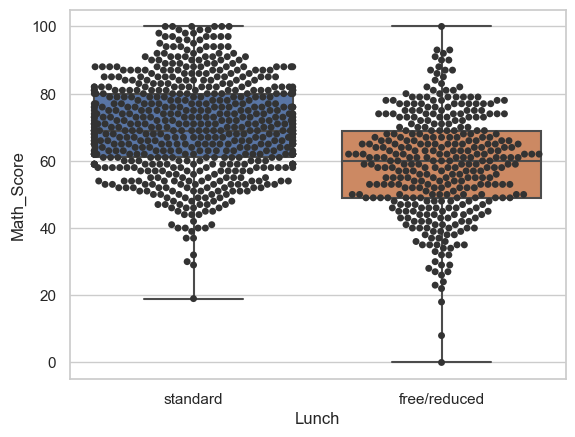

In [80]:
#Öğle yemeği türüne göre matematik puanlarının kutu grafiği ile dağılımını gösterip her bir örnek için bir çizgi çizerek, 
#her bir puanın nerede bulunduğunu gösterelim.
sns.boxplot(x=data['Lunch'],y=data['Math_Score'],whis=np.inf)
sns.swarmplot(x=data['Lunch'],y=data['Math_Score'],color='.2')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


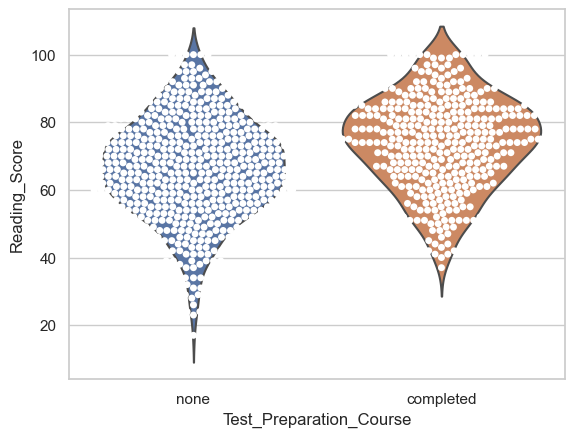

In [81]:
#Öğrencilerin test hazırlık kursuna katılıp katılmadığına göre okuma puanlarının dağılımını gösteren bir violin plot grafiği oluşturalım.
sns.violinplot(x=data['Test_Preparation_Course'],y=data['Reading_Score'],inner=None)
sns.swarmplot(x=data['Test_Preparation_Course'],y=data['Reading_Score'],color='white',edgecolor='gray')
plt.show()

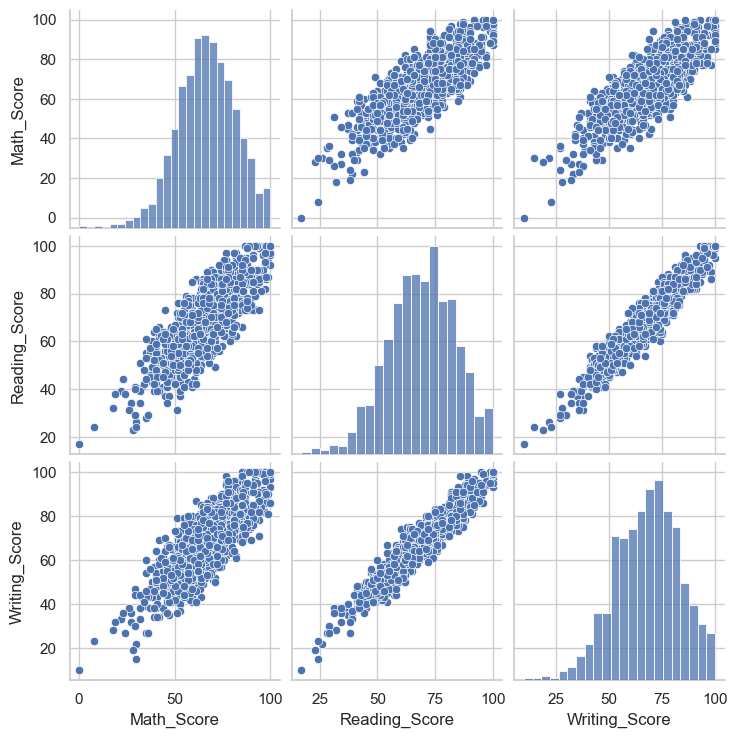

In [82]:
#veri setindeki her bir değişkenin birbirleriyle olan ilişkisini ve aynı değişkenin kendi kendisiyle olan ilişkisini gösteren
#bir çift özellik grafiği oluşturalım.
sns.pairplot(data)
plt.show()

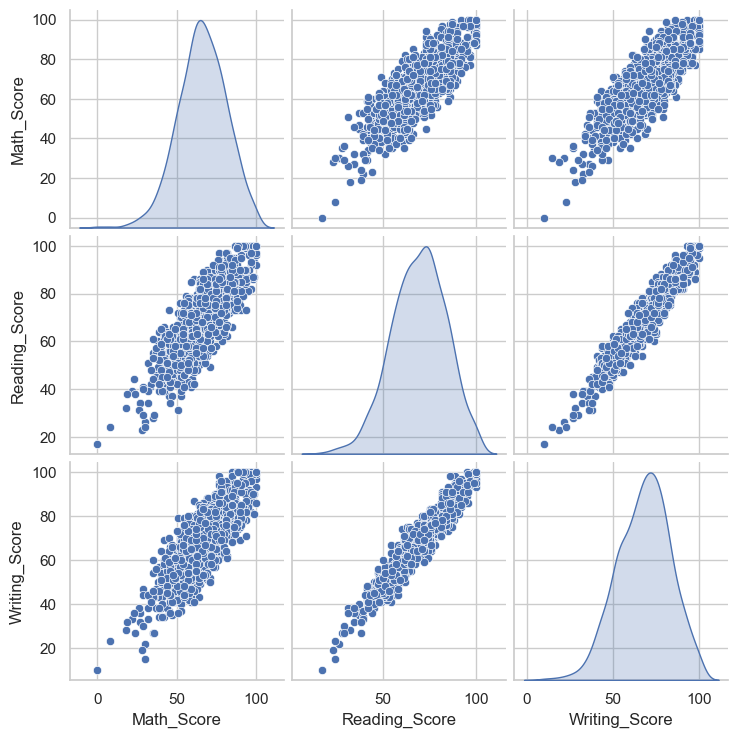

In [83]:
#pairplot fonksiyonunu kullanarak, veri setindeki her değişkenin diğer değişkenlerle olan ilişkisini görselleştirelim.
sns.pairplot(data,diag_kind='kde')
plt.show()

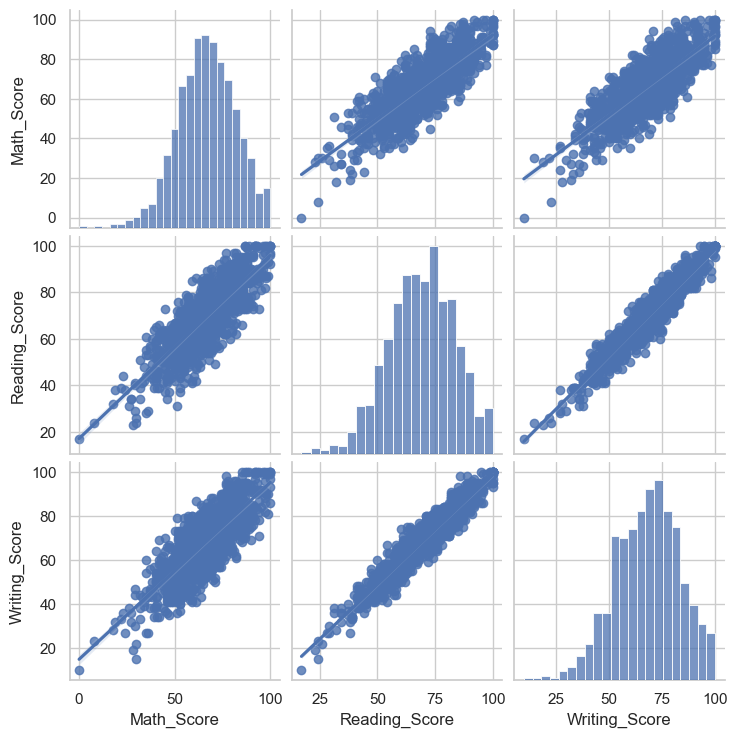

In [84]:
#pairplot fonksiyonunu kullanarak, veri kümesindeki her değişkenin diğer değişkenlerle olan ilişkisini görselleştirelim.
sns.pairplot(data,kind='reg')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:608: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:658: UserWarning: You passed a

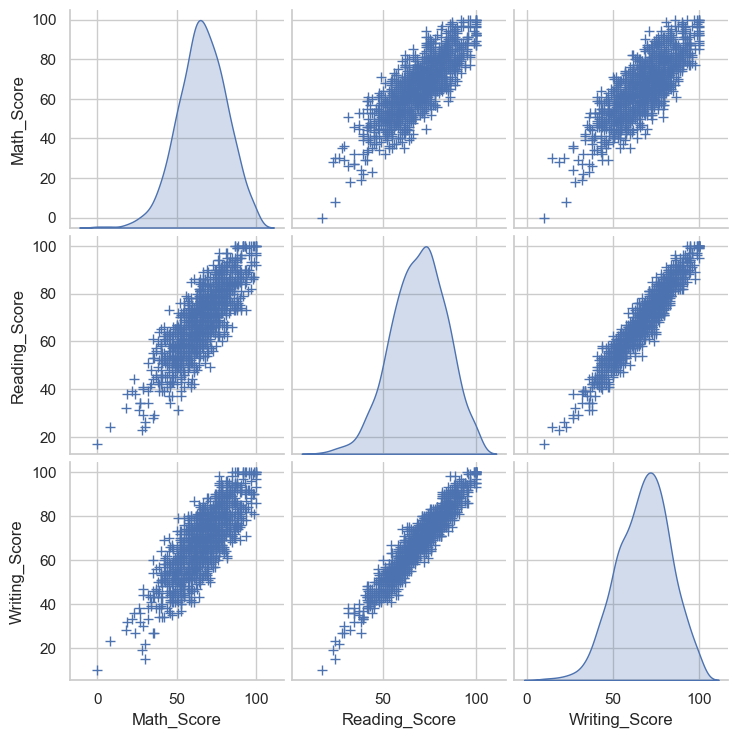

In [85]:
#pairplot() fonksiyonunu kullanarak veri setindeki tüm sayısal değişkenler arasındaki ilişkiyi gösteren bir 
#çiftsel dağılım grafiği oluşturalım.
sns.pairplot(data, diag_kind="kde", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                  diag_kws=dict(shade=True))
plt.show()

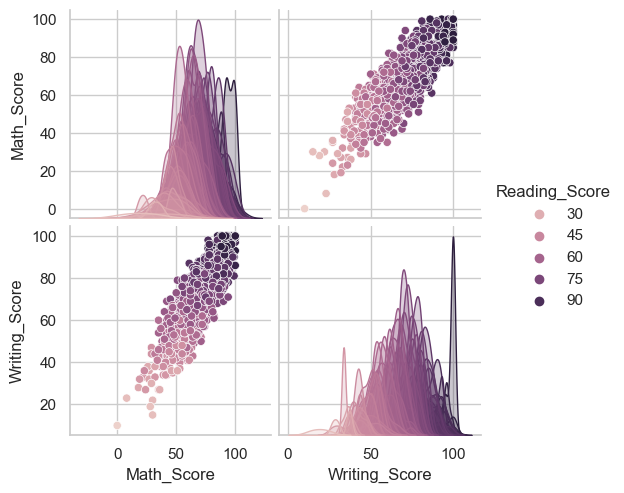

In [86]:
#Bu sefer hue parametresi kullanılarak Reading_Score değişkeninin renklendirilmesi sağlayalım.
sns.pairplot(data, hue="Reading_Score")
plt.show()

In [87]:
#Veri setindeki sütunların isimlerini listeleyelim.
data.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


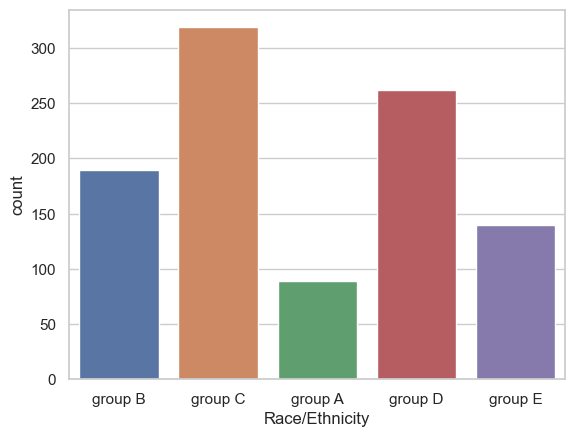

In [88]:
#Race/Ethnicity' sütunundaki farklı değerlerin sayılarını gösteren bir sütun grafiği oluşturalım.
sns.countplot(data['Race/Ethnicity'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


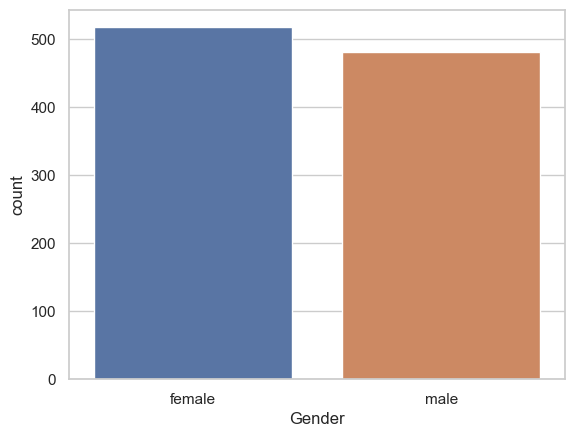

In [89]:
#öğrencilerin cinsiyetlerine göre sayılarının hesaplandığı ve bu sayıların bir çubuk grafikte gösterildiği bir görselleştirme yapalım.
sns.countplot(data['Gender'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


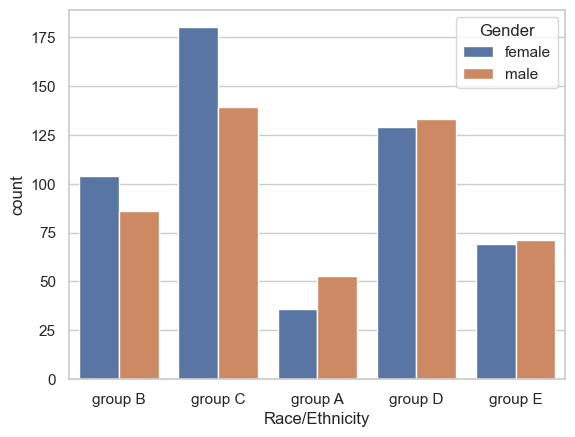

In [90]:
#Öğrencilerin etnik kökenlerine göre cinsiyet dağılımını gösteren bir countplot grafiği oluşturalım.
sns.countplot(data['Race/Ethnicity'],hue=data['Gender'])
plt.show()

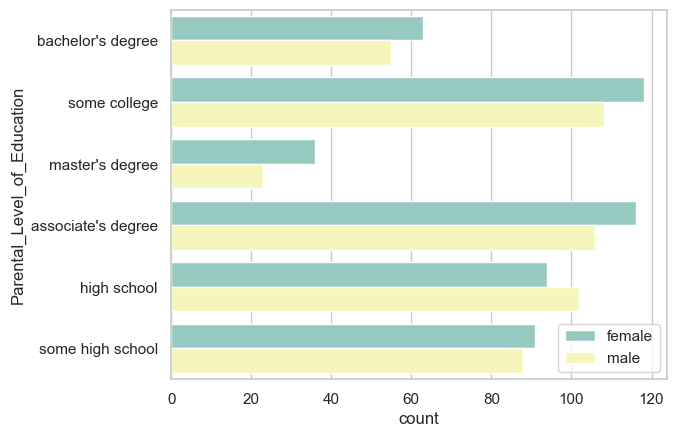

In [91]:
#Öğrencilerin ebeveynlerinin eğitim seviyesine ve cinsiyetine göre sayısını gösteren yatay bir çubuk grafik (countplot) oluşturalım.
sns.countplot(y=data['Parental_Level_of_Education'],palette="Set3",hue=data['Gender'])
plt.legend(loc=4)
plt.show()

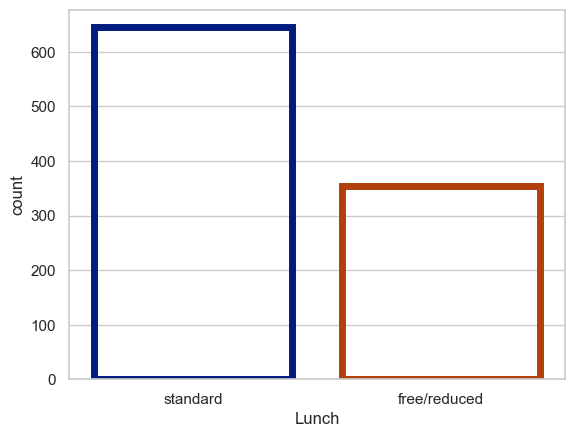

In [92]:
#Öğle yemeği türlerinin sayısını gösteren bir sütun grafiği oluşturalım.
sns.countplot(x=data['Lunch'],facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
plt.show()

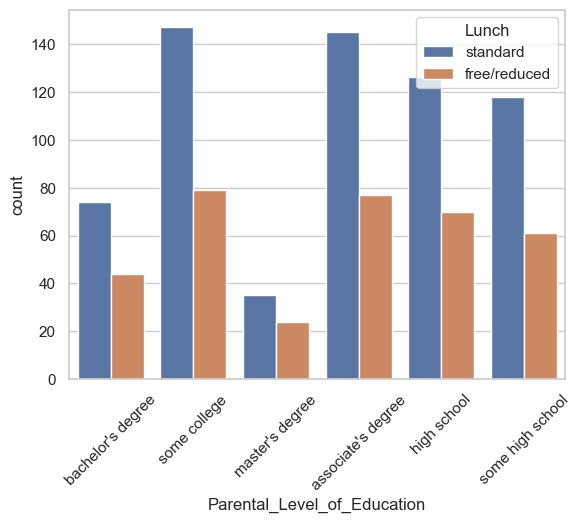

In [93]:
#Öğrencilerin anne-baba eğitim seviyelerine göre yemek türlerinin sayısını gösteren bir sütun grafiği oluşturalım.
sns.countplot(x="Parental_Level_of_Education", hue="Lunch",
                 data=data)
plt.xticks(rotation=45)
plt.show()

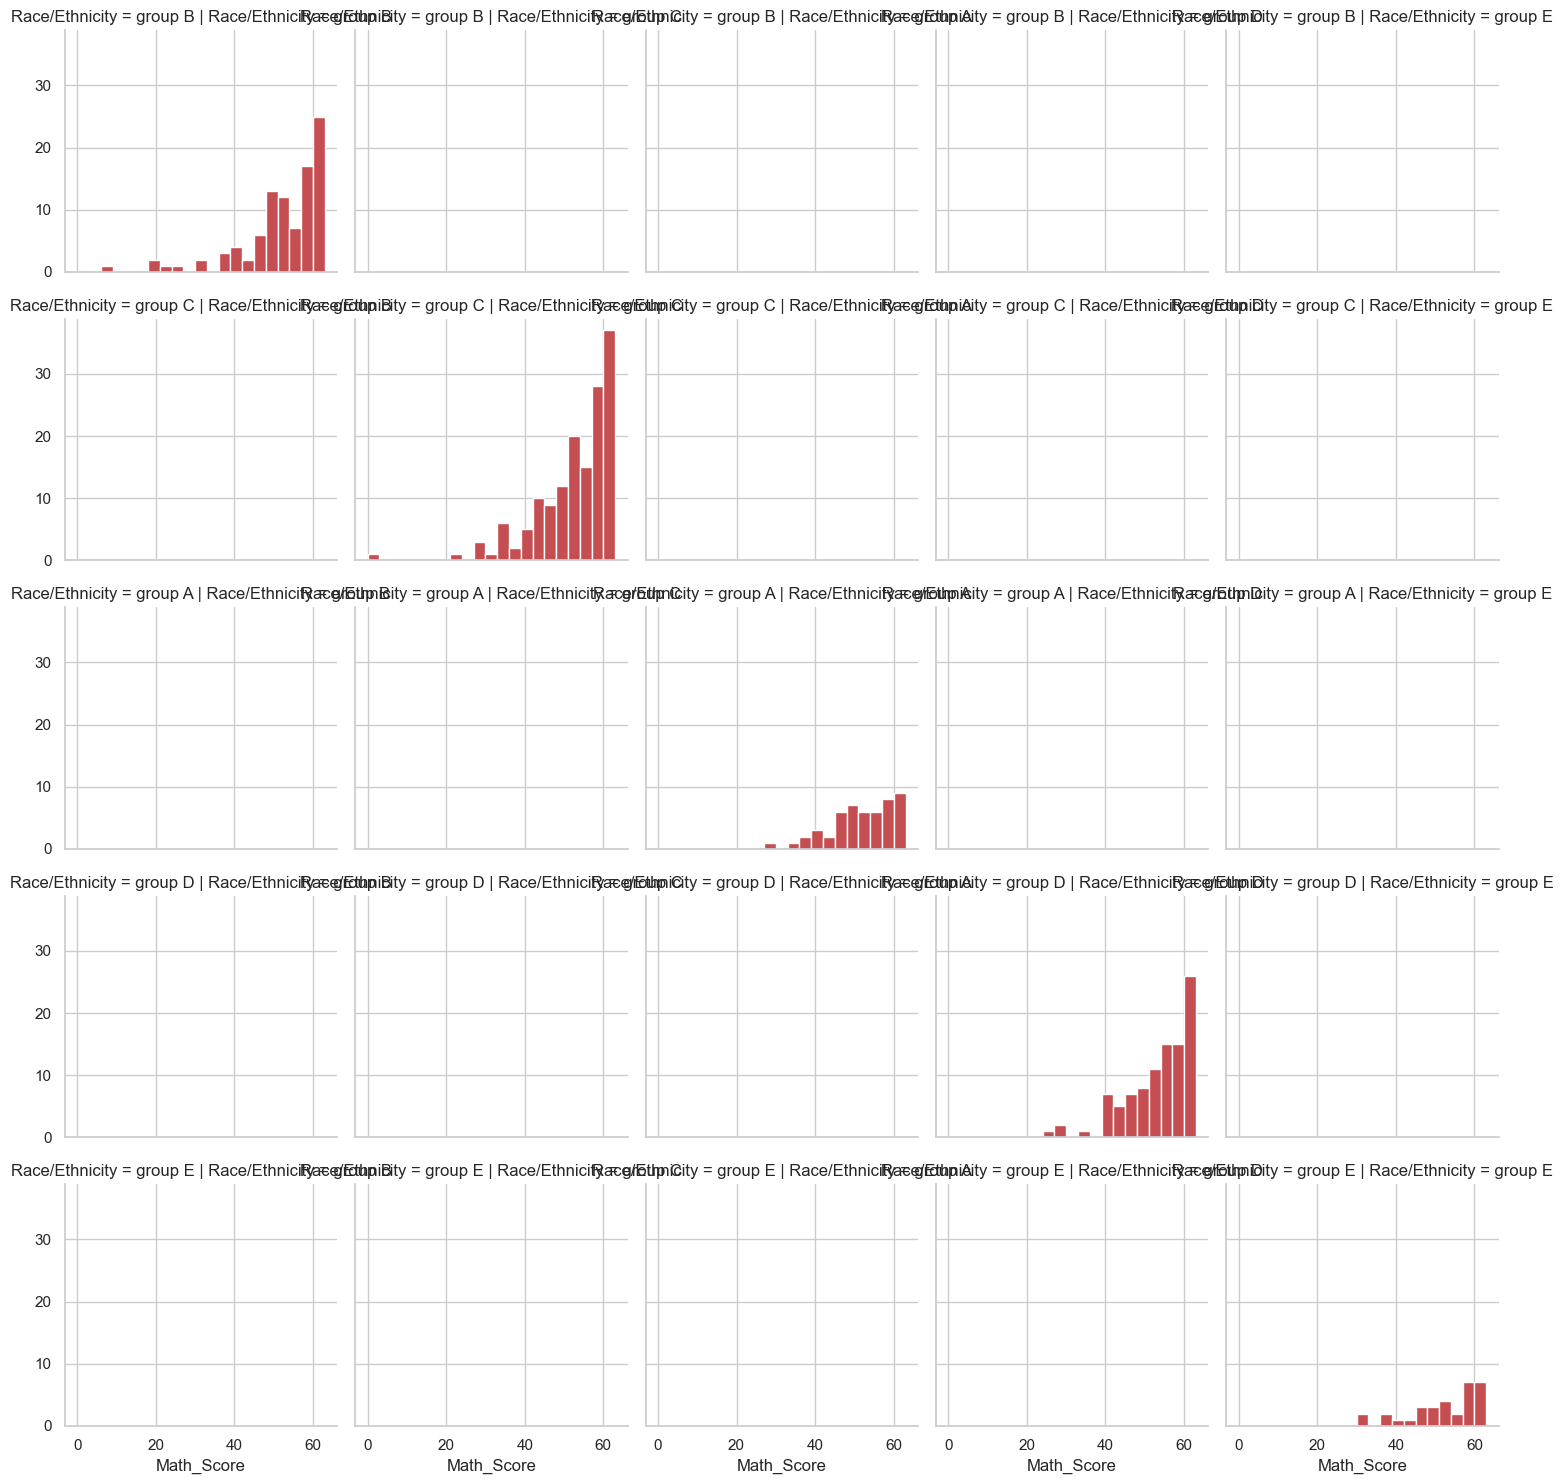

In [95]:
#Öğrencilerin etnik kökenlerine göre gruplandırıldığı ve her gruptaki öğrencilerin matematik puanları için histogramlar oluşturduğu bir facet grid grafiği oluşturalım.
g=sns.FacetGrid(data,col='Race/Ethnicity',row='Race/Ethnicity')
g=g.map(plt.hist,"Math_Score",bins=np.arange(0,65,3),color='r')
plt.show()

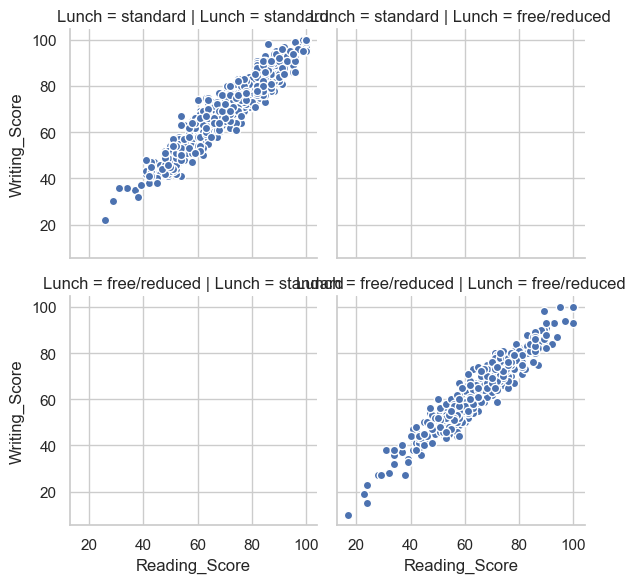

In [96]:
#FacetGrid fonksiyonunu kullanarak, data veri çerçevesindeki farklı Lunch değerlerine sahip öğrencilerin Reading_Score
#ve Writing_Score puanlarının dağılımını gösteren bir ızgara grafiği oluşturalım.
g=sns.FacetGrid(data,col='Lunch',row='Lunch')
g=(g.map(plt.scatter,"Reading_Score",'Writing_Score',edgecolor='w').add_legend())
plt.tight_layout()
plt.show()

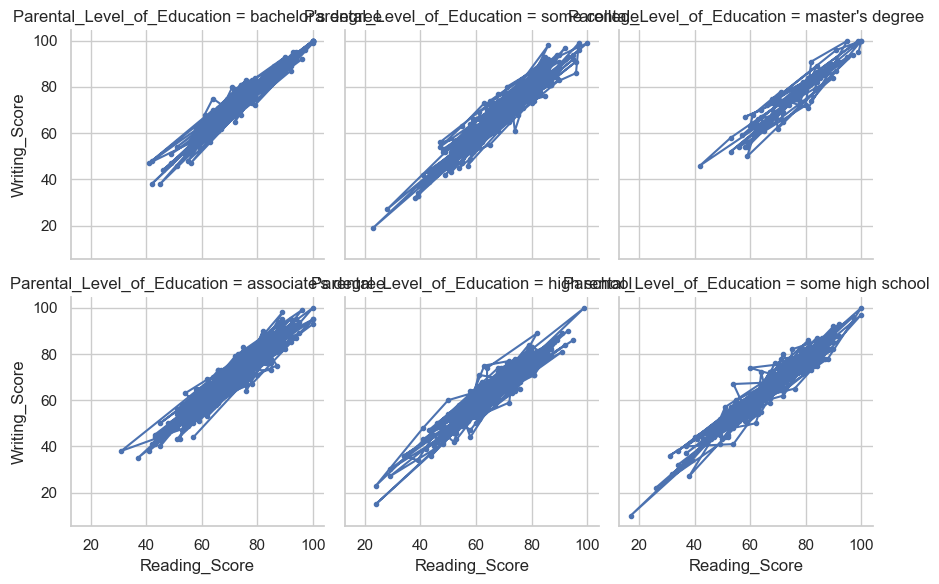

In [97]:
#Öğrencilerin ebeveynlerinin eğitim düzeylerine göre okuma ve yazma puanlarının dağılımını gösteren bir facet grid oluşturalım.
g = sns.FacetGrid(data, col="Parental_Level_of_Education", col_wrap=3)
g = g.map(plt.plot, "Reading_Score", "Writing_Score", marker=".")
plt.show()

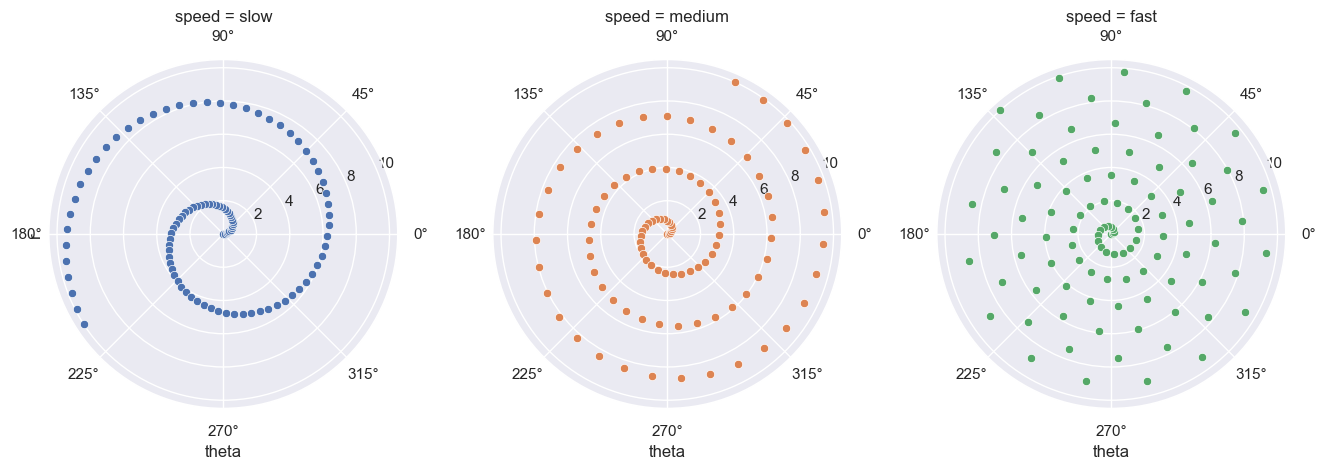

In [98]:
#Polar bir projeksiyon kullanarak, her biri farklı bir hızda dönen bir nesnenin açısal hızını (theta) ve uzaklığını (r) gösteren
#bir scatterplot grafiği oluşturalım. 
#"slow", "medium" ve "fast" isimli üç farklı hızda dönmesi planlanan nesnelerin açısal hızları ve uzaklıkları polar koordinat
#düzleminde çizilir. 
#sns.FacetGrid() fonksiyonu, altı adet subplot içeren bir grid oluşturur ve her bir subplot'ta, 
#ayrı bir hız için bir scatterplot çizimi yapar. 
#Her bir scatterplot, subplot_kws parametresi ile belirlenen polar projeksiyonunu kullanarak çizilir. 
#Ayrıca, her bir subplot'un rengi, "speed" sütunundaki değerlere göre belirlenir ve legend otomatik olarak oluşturulur.
sns.set()

r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

g.map(sns.scatterplot, "theta", "r")
plt.show()

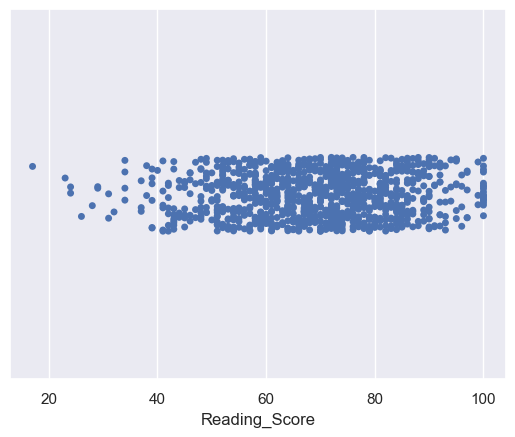

In [100]:
#Okuma puanlarına ait dağılımı çizdirelim.
sns.stripplot(x=data['Reading_Score'])
plt.show()

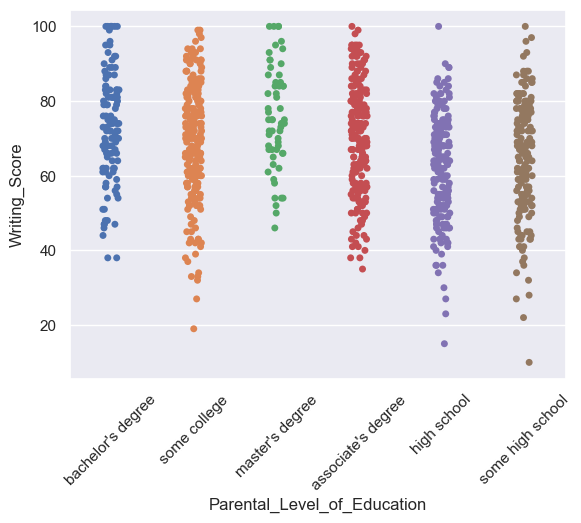

In [101]:
#aile eğitim düzeyi ile öğrencilerin yazma notları arasındaki ilişkiyi gösteren bir şerit grafiği çizelim.
sns.stripplot(x="Parental_Level_of_Education",y='Writing_Score',data=data)
plt.xticks(rotation=45)
plt.show()

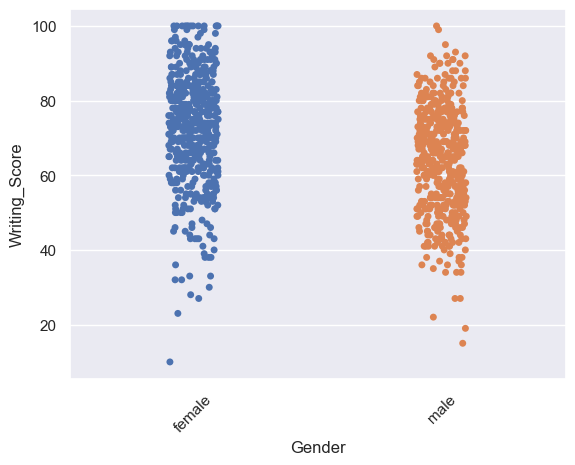

In [102]:
#Öğrencilerin cinsiyetine göre yazma puanlarına dağılımını gösteren bir strip plot çizelim. 
#jitter=True argümanı, verilerin daha iyi görülebilmesi için strip plot'taki konumlarının biraz rastgeleleştirilmesini sağlar. 
#plt.xticks(rotation=45) satırı, x eksenindeki etiketlerin 45 derece açıyla döndürülmesini sağlar.
sns.stripplot(x="Gender",y='Writing_Score',jitter=True,data=data)
plt.xticks(rotation=45)
plt.show()

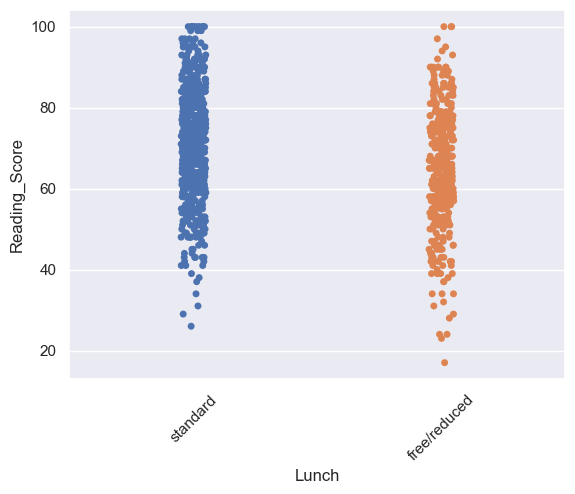

In [103]:
#Yemek türüne göre okuma puanı dağılımını görselleştirelim. 
#Her yemek türü için bir yatay çizgi gösterilir ve bu çizgi üzerindeki noktalar, o yemek türüne sahip öğrencilerin okuma 
#puanlarına karşılık gelir. 
#jitter=0.05 argümanı, aynı yatay konumda olan noktaların birbirine bindirmesini önlemek için bir miktar rastgele kaydırma yapar.
#plt.xticks(rotation=45) kodu, x eksenindeki etiketlerin 45 derece döndürülmesini sağlar.
sns.stripplot(x="Lunch",y='Reading_Score',jitter=0.05,data=data)
plt.xticks(rotation=45)
plt.show()

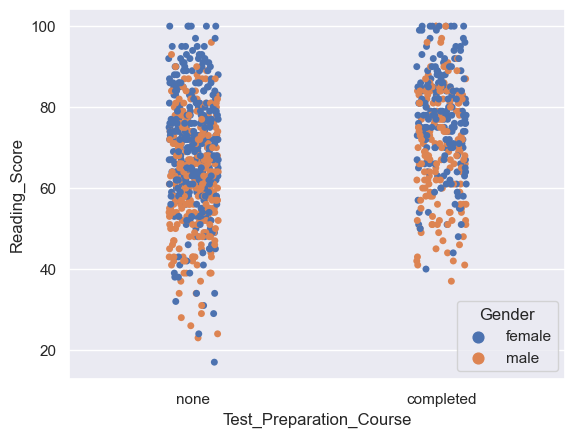

In [104]:
#Öğrencilerin okuma puanlarına göre cinsiyetlerine göre test hazırlık kursu alıp almadıklarına ilişkin strip plot
#(dağılım grafiği) oluşturalım.
sns.stripplot(x='Test_Preparation_Course',y='Reading_Score',hue='Gender',jitter=True,data=data)
plt.show()

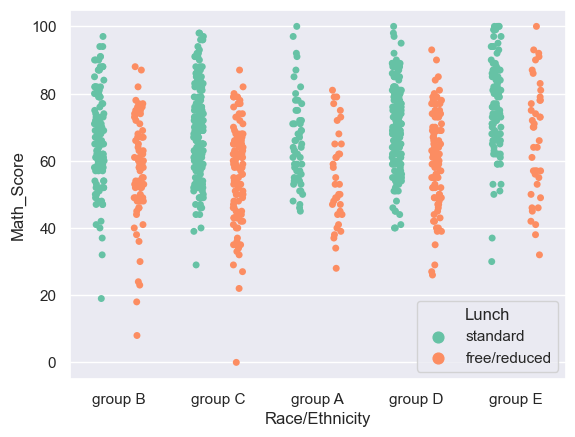

In [105]:
#Öğrencilerin Matematik Notlarına göre, yemeği ücretsiz veya indirimli alanların (Lunch) ve etnik kökenlerinin (Race/Ethnicity) 
#karşılaştırmasını yapmak için bir striplot grafiği oluşturalım. 
#'jitter' parametresi noktaların çakışmasını azaltmak için biraz rasgele sapma ekler. 
#'dodge' parametresi, farklı kategorilerdeki noktaların yan yana durmasını sağlar. 
#'palette' parametresi değiştirilerek kullanılan renk paleti değiştirilebilir.
sns.stripplot(x='Race/Ethnicity',y='Math_Score',hue='Lunch',jitter=True,dodge=True,palette="Set2",data=data)
plt.show()

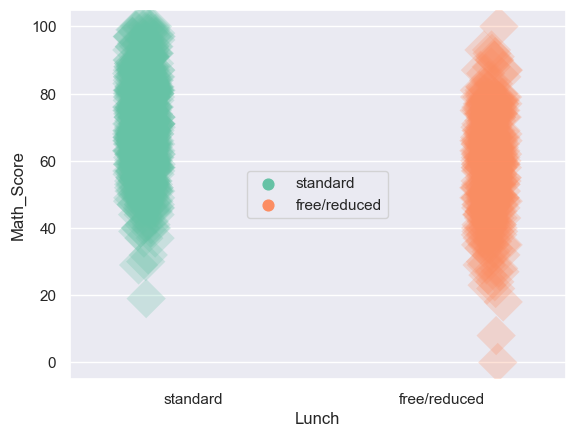

In [106]:
#Öğle yemeği türüne göre Matematik Notu ile nokta grafiği çizdirelim.
sns.stripplot(x='Lunch',y='Math_Score',hue='Lunch',jitter=True,dodge=True,size=20,marker='D',edgecolor='gray',alpha=.25,palette="Set2",data=data)
plt.legend(loc=10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


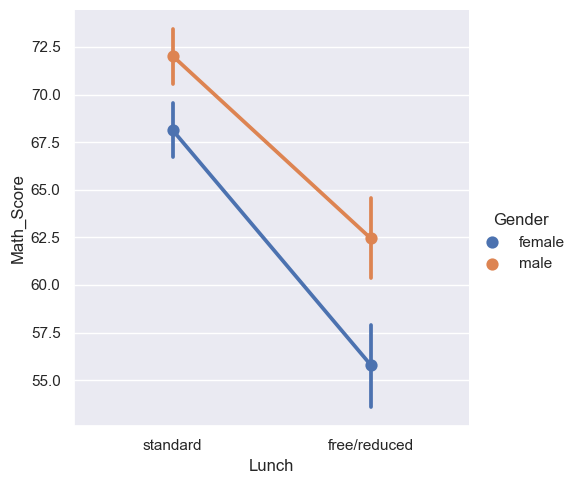

In [107]:
#Öğrencilerin yemek türüne göre matematik notlarına ve cinsiyete göre ayrılan bir faktör grafiği oluşturalım. 
#x ekseninde yemek türleri (standart veya ücretsiz/reduced), y ekseninde matematik notları yer alsın. 
#hue parametresi cinsiyeti ayırmaya yarar ve her cinsiyetin farklı bir renkle gösterilmesini sağlar.
sns.factorplot(x="Lunch", y="Math_Score", hue="Gender", data=data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


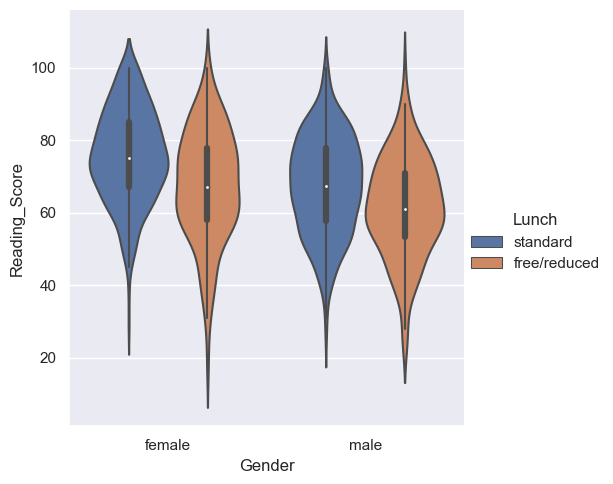

In [108]:
#Yemek türüne (öğle yemeği veya ücretsiz/kontrollü öğle yemeği) ve cinsiyete göre okuma notlarının dağılımını gösteren bir violin grafiği oluşturalım.
sns.factorplot(x="Gender", y="Reading_Score", hue="Lunch", kind='violin',data=data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


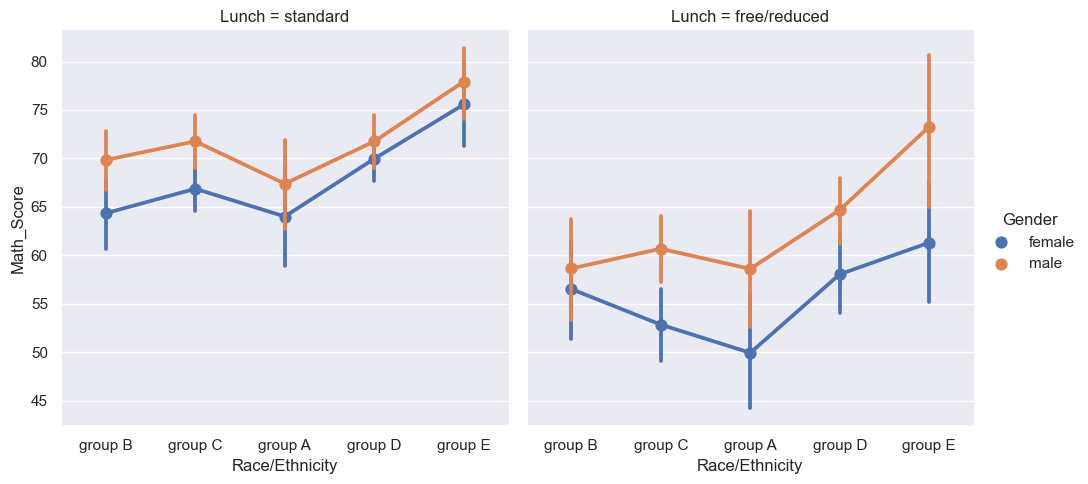

In [109]:
#Öğrencilerin etnik kökenleri, cinsiyetleri ve öğle yemeği türlerine göre matematik notlarının karşılaştırılmasını gösteren 
#ayrılmış alt grafikler içeren bir faktör grafiği oluşturalım. 
#X ekseni etnik kökeni, y ekseni ise matematik notunu göstersin.
sns.factorplot(x="Race/Ethnicity", y="Math_Score", hue="Gender",col='Lunch',data=data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


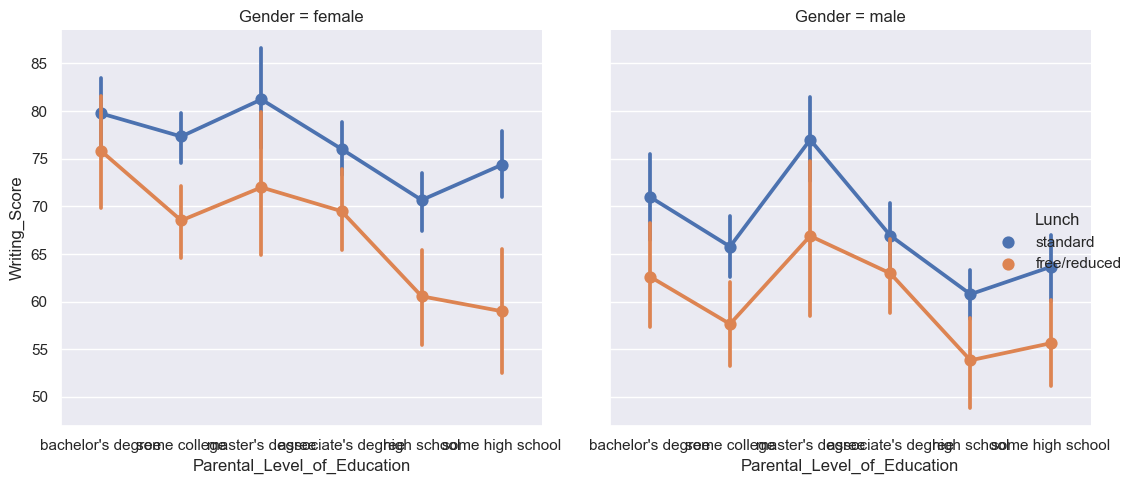

In [110]:
#Cinsiyet ve öğle yemeği durumuna göre ayrılmış alt grafiklerde, ebeveynlerin eğitim düzeyine göre öğrencilerin yazma notlarının
#dağılımını gösteren bir faktör çizgi grafiği oluşturalım.
g=sns.factorplot(x="Parental_Level_of_Education", y="Writing_Score", hue="Lunch",
                col="Gender", data=data)
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


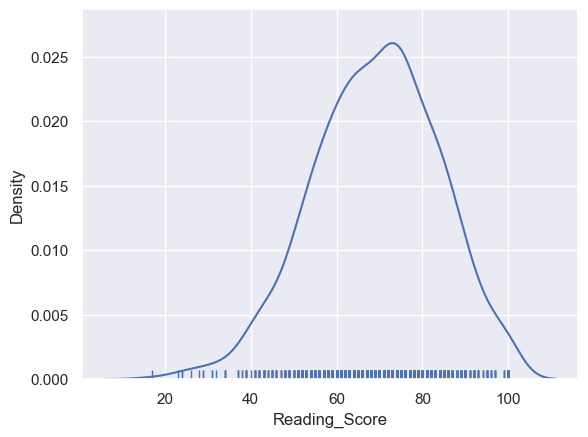

In [111]:
#Okuma puanlarının dağılımını görselleştiren bir yoğunluk grafiği çizelim.
ax = sns.distplot(data['Reading_Score'], rug=True, hist=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


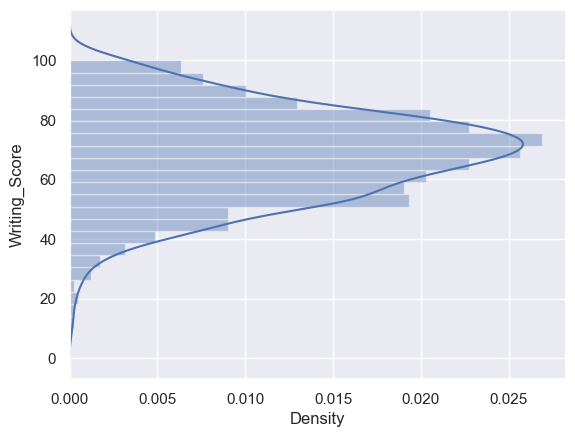

In [112]:
#DataFrame'mimizin "Writing_Score" sütunundaki verilerin dağılımını gösteren bir grafik oluşturalım.
ax = sns.distplot(data['Writing_Score'], vertical=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


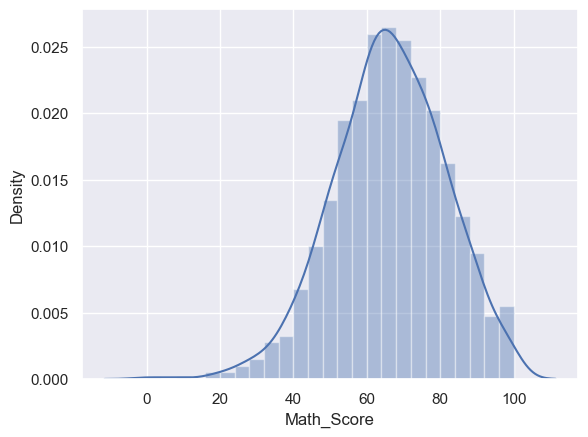

In [113]:
#veri kümesindeki "Math_Score" sütunundaki verilerin dağılımını gösteren bir yoğunluk grafiği çizdirelim.
ax = sns.distplot(data['Math_Score'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


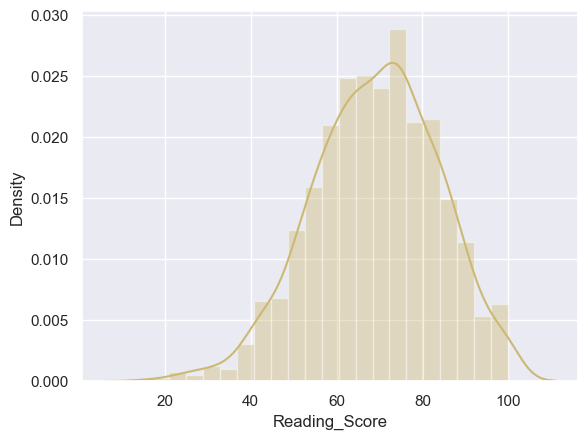

In [114]:
#veri setindeki Reading_Score sütunundaki verilerin histogramını çizerek dağılımını görselleştirelim.
ax = sns.distplot(data['Reading_Score'], color="y")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seab

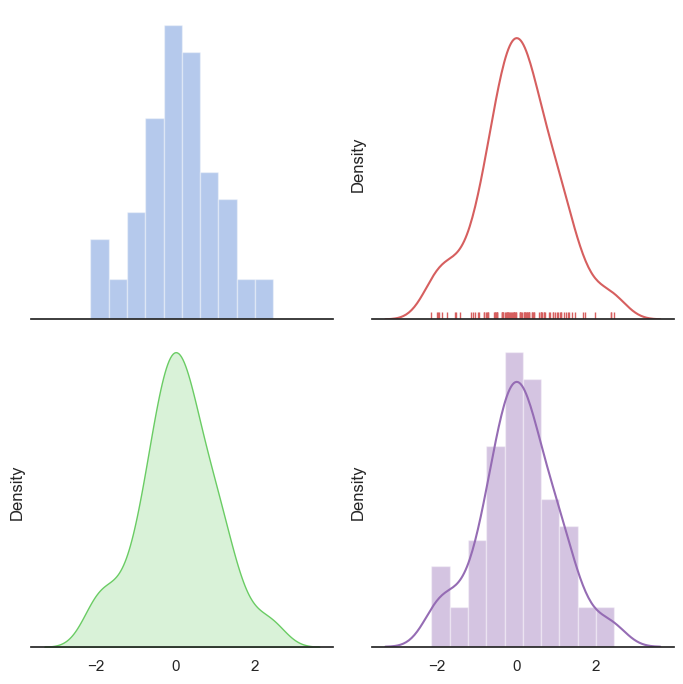

In [115]:
#distplot() fonksiyonunu kullanarak farklı veri dağılımlarını görselleştirelim. 
#Kodumuz, 2x2 boyutunda 4 alt grafik oluşturur ve her birinde bir veri dağılımı gösterir.
#İlk grafik, bir veri kümesinin basit bir histogramını gösterir. 
#İkinci grafik, aynı veri kümesi için bir kernel yoğunluk tahmini (KDE) ve rug plot (veri noktalarını gösteren çizgi) gösterir. 
#Üçüncü grafik, KDE'nin altındaki alanı dolduran bir KDE gösterir. 
#Dördüncü grafik ise histogram ve KDE'yi bir arada gösterir.

np.random modülü ile oluşturulan rasgele veri kümesi üzerinde örneklemeler yaparak, Seaborn kütüphanesinin farklı görselleştirme yöntemlerini uygulamayı gösterir. sns.despine() fonksiyonu çizgilerin sol ve üst kısımlarını kaldırarak grafikleri daha temiz hale getirir.
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

d = rs.normal(size=100)

sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

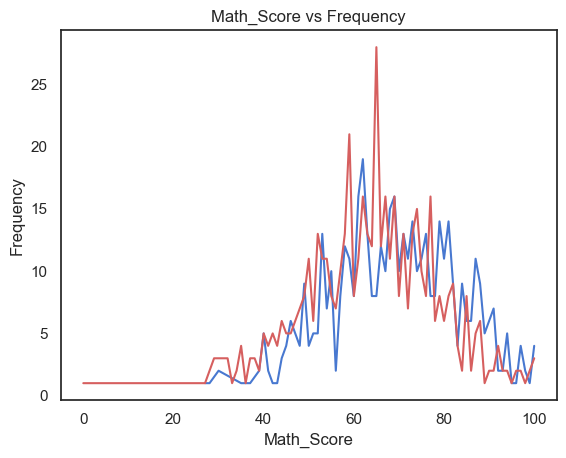

In [116]:
#Veri setimizdeki 'Gender' özelliği 'male' olan öğrencilerin matematik notlarına ve 'Gender' özelliği 'female' olan öğrencilerin
#matematik notlarına göre frekansları gösteren bir çizgi grafiği oluşturalım.
data[data['Gender']=='male']['Math_Score'].value_counts().sort_index().plot.line(color='b')
data[data['Gender']=='female']['Math_Score'].value_counts().sort_index().plot.line(color='r')
plt.xlabel('Math_Score')
plt.ylabel('Frequency')
plt.title('Math_Score vs Frequency')
plt.show()

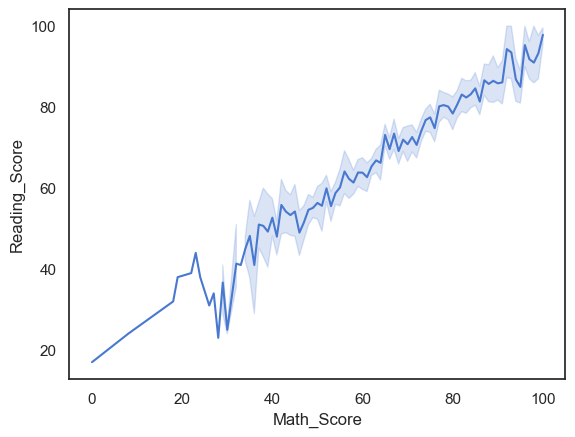

In [117]:
#Öğrencilerin Matematik ve Okuma notları arasındaki ilişkiyi gösteren bir çizgi grafiği oluşturalım. 
#x-ekseni Matematik notlarını, y-ekseni Okuma notlarını göstersin.
sns.lineplot(x='Math_Score',y='Reading_Score',data=data)
plt.show()

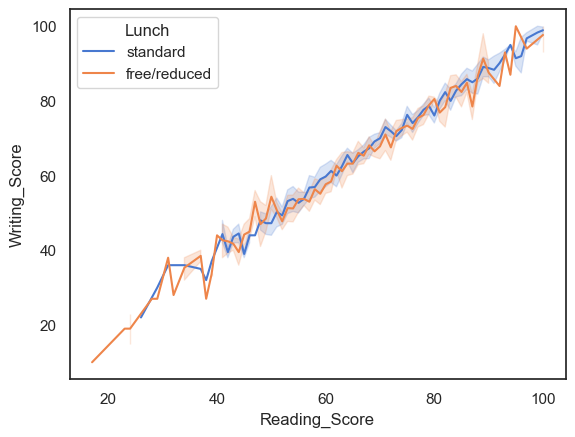

In [118]:
#Öğrencilerin okuma ve yazma notları arasındaki ilişkiyi göstermek için bir çizgi grafiği oluşturalım. 
#x='Reading_Score' ve y='Writing_Score' argümanları, okuma notları ve yazma notlarına karşılık gelsin. 
#hue='Lunch' argümanı, farklı öğle yemeği türlerindeki öğrencileri renklerle ayırmak için kullanılır.
sns.lineplot(x='Reading_Score',y='Writing_Score',hue='Lunch',data=data)
plt.show()

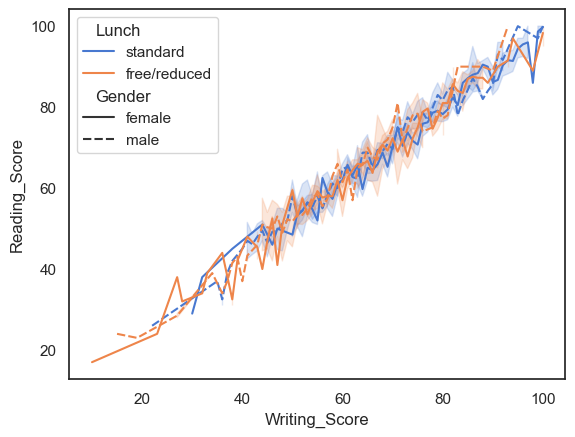

In [119]:
#Öğrencilerin Writing_Score ve Reading_Score puanları arasındaki ilişkiyi inceleyelim. 
#Hue parametresi sayesinde öğle yemeği alan ve almayan öğrencilerin puanları arasındaki farkı gösteren bir renk skalası ekleyelim. 
#Ayrıca stil parametresi de kullanılarak cinsiyetlere göre farklı çizgi stilleri kullanalım. 
#Sonuç olarak, öğrencilerin Writing_Score ve Reading_Score puanları arasında genel olarak pozitif bir ilişki olduğu görülmektedir
#ve öğle yemeği alan öğrencilerin daha yüksek puanlar aldığı gözlemlenmektedir.
sns.lineplot(x='Writing_Score',y='Reading_Score',data=data,hue='Lunch',
            style='Gender')
plt.show()

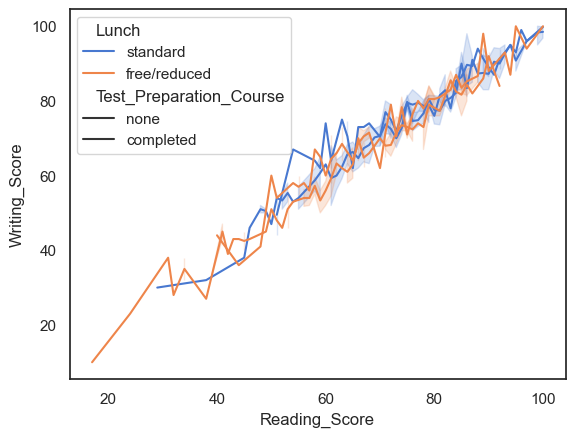

In [120]:
#'Gender' sütununda 'female' değeri olan satırları filtreler ve bu satırları kullanarak bir çizgi grafiği oluşturalım. 
#X ekseninde 'Reading_Score', y ekseninde 'Writing_Score' kullanalım. 
#'Lunch' ve 'Test_Preparation_Course' sütunlarına göre renklendirme ve stil uygulayalım. 
#'dashes=False' parametresi çizgilerin kesik olmamasını sağlar.
female_filter=data[data['Gender']=='female']
sns.lineplot(x='Reading_Score',y='Writing_Score',data=female_filter,
            hue='Lunch',style='Test_Preparation_Course',dashes=False)
plt.show()

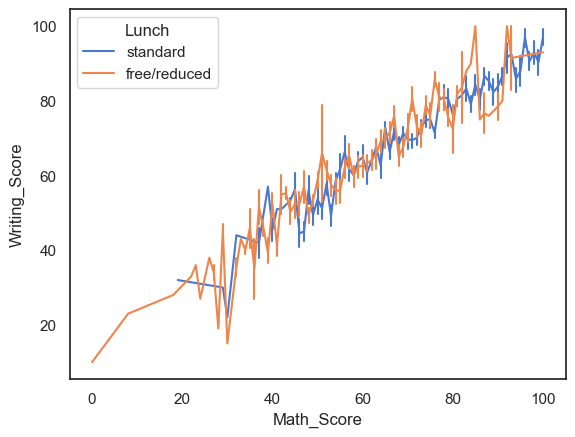

In [121]:
#Veri kümemizdeki Math_Score ve Writing_Score sütunları arasındaki ilişkiyi görselleştirelim. 
#hue parametresi, öğle yemeği türüne göre ayrılmış çizgi grafiğini oluşturur. 
#err_style ve ci parametreleri hata çubuklarının görünümünü belirler. 
#err_style parametresi, hata çubukları yerine hata çizgileri kullanılmasını belirtir ve 
#ci parametresi, verilerin %68'ini içeren güven aralığını belirler.
sns.lineplot(x="Math_Score", y="Writing_Score", hue="Lunch",err_style="bars", ci=68, data=data)
plt.show()

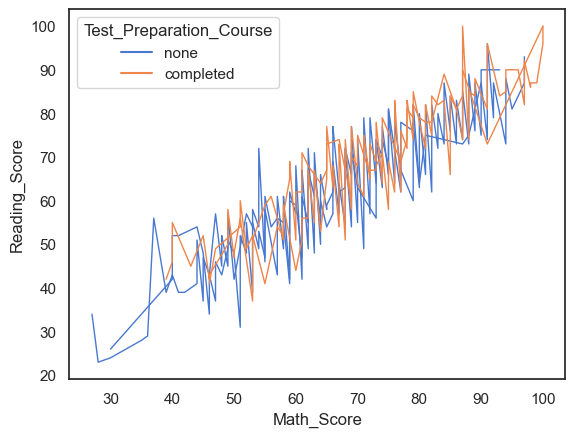

In [122]:
#Gender" değişkeni "male" olan verilerden oluşan alt bir veri kümesi oluşturarak, "Math_Score" ve "Reading_Score" değişkenleri
#arasındaki ilişkiyi gösteren bir çizgi grafiği çizelim. 
#"Test_Preparation_Course" değişkeniyle ayrıştırarak, her bir yemeğe (Lunch) ait ayrı bir çizgi grafiği oluşturalım. 
#"estimator" parametresi None olarak ayarlandığından, çizgi grafiğinde noktaların değerlerini gösterir ve 
#ortalamalar yerine doğrudan ölçümler görüntülenir.
ax = sns.lineplot(x="Math_Score", y="Reading_Score", hue="Test_Preparation_Course",
                   units="Lunch", estimator=None, lw=1,
                   data=data.query("Gender == 'male'"))

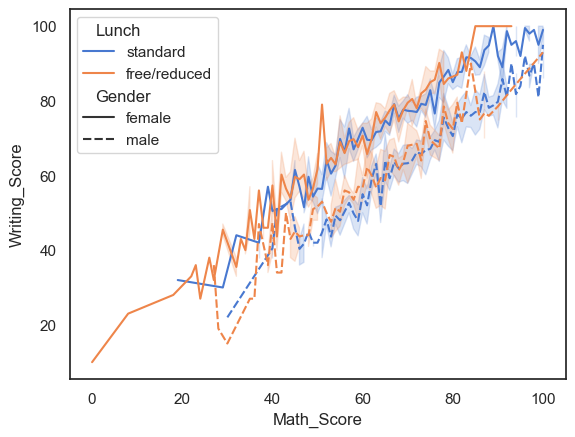

In [123]:
#Matematik puanlarına göre Yazma puanlarının farklı yemek kategorileri ve cinsiyetlere göre nasıl dağıldığını görselleştirelim. 
#Bu, verilerin eğilimlerini ve dağılımlarını karşılaştırmak ve bu faktörlere göre değişen ilişkileri gözlemlemek için 
#kullanışlı bir yöntemdir.
ax = sns.lineplot(x="Math_Score", y="Writing_Score",
                   hue="Lunch", style="Gender",
                   data=data)
plt.show()

In [124]:
#'Gender' sütununa göre verileri gruplandırıp ve 'Writing_Score' ve 'Reading_Score' sütunları için cinsiyete göre ortalama 
#değerleri hesaplayalım.
data.groupby('Gender')[['Writing_Score','Reading_Score']].mean()

Writing_Score  Reading_Score
Gender                              
female      72.467181      72.608108
male        63.311203      65.473029

In [125]:
#"Parental_Level_of_Education" sütunu "bachelor's degree" olan öğrencilerin "Race/Ethnicity" sütununa göre gruplandırılmış 
#"Math_Score" sütunundaki her bir değerin sayısını hesaplayalım ve bu değerleri bir pandas Series nesnesi olarak x değişkenine 
#atayalım.
x=data[data.Parental_Level_of_Education=='bachelor\'s degree'].groupby('Race/Ethnicity')['Math_Score'].count()
x

Race/Ethnicity
group A    12
group B    20
group C    40
group D    28
group E    18
Name: Math_Score, dtype: int64

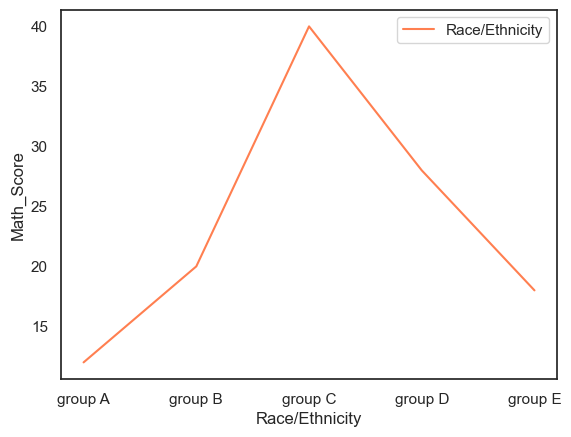

In [126]:
#'bachelor's degree' derecesine sahip ebeveynlere sahip öğrencilerin, her etnik gruptaki matematik notu sayısını hesaplayalım
#ve çizgi grafiği kullanarak görselleştirelim.
sns.lineplot(data=x,color='coral',label='Race/Ethnicity')
plt.show()

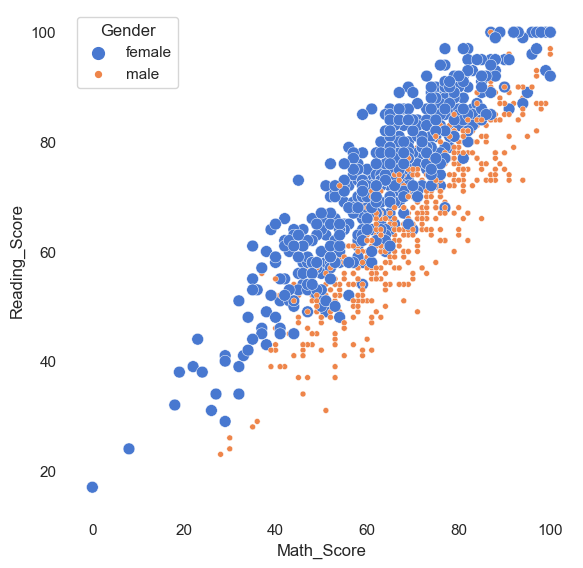

In [127]:
#öğrencilerin matematik notlarına ve okuma notlarına göre cinsiyetlerine göre dağılımlarını gösteren bir scatter plot
#(nokta dağılım grafiği) oluşturalım.
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Math_Score", y="Reading_Score",
                hue="Gender", size="Gender",data=data)
plt.show()

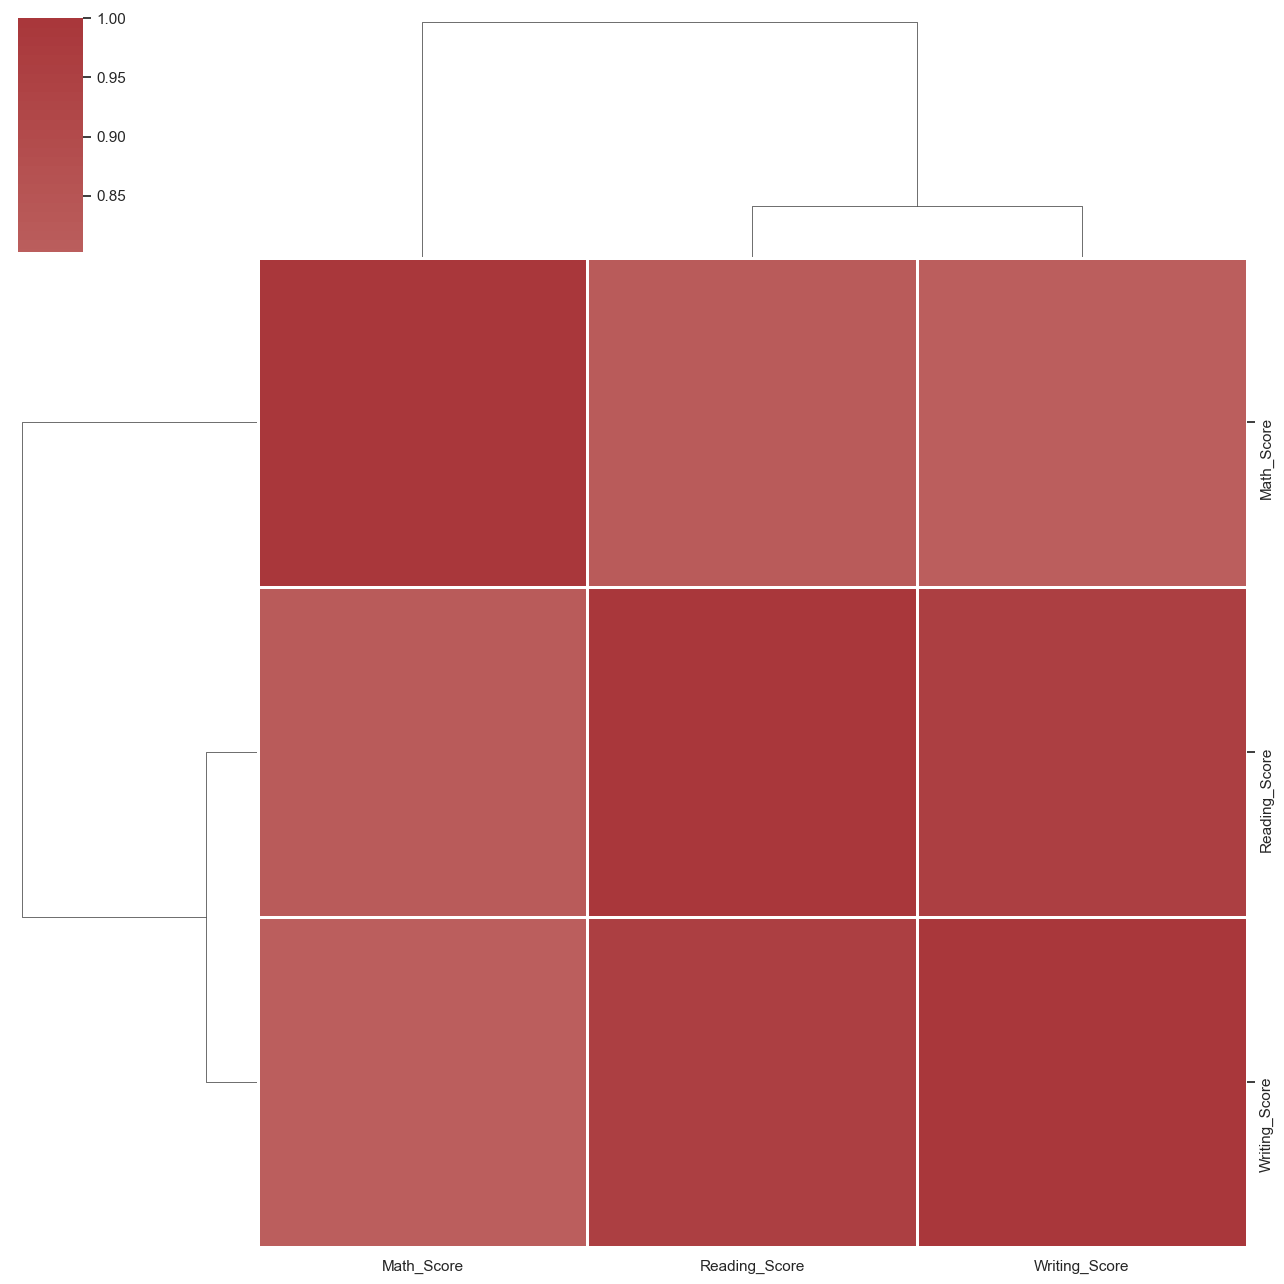

In [128]:
#Veri setindeki sütunların Pearson korelasyon katsayılarını hesaplayalım ve bir kümeleme haritası şeklinde görselleştirelim.
#Her sütun birbirleriyle ne kadar ilişkili olduklarını gösteren bir renk skalasına sahip bir ısı haritası olarak gösterilir. 
#Yoğunlukları yüksek olan renkler, sütunlar arasındaki yüksek korelasyonu gösterirken, 
#daha az yoğun renkler düşük korelasyonu gösterir.
sns.clustermap(data.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

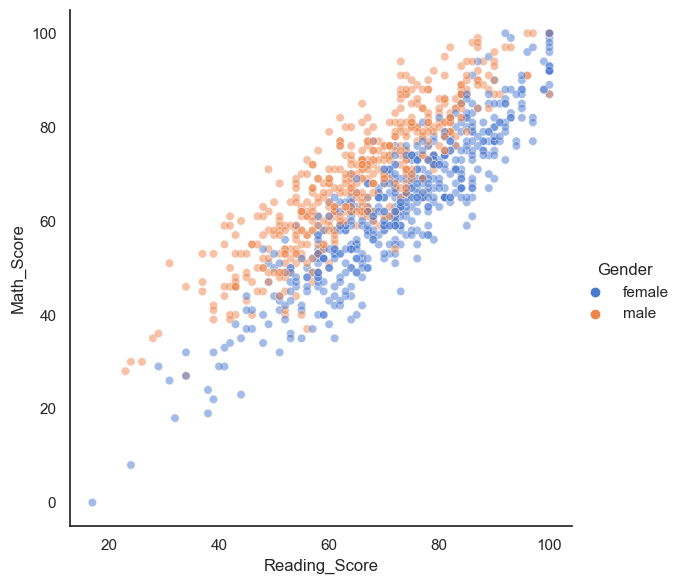

In [129]:
#Öğrencilerin Matematik ve Okuma puanlarını, cinsiyetlerine göre farklı renklerle işaretleyerek görselleştirelim.
sns.set(style="white")
sns.relplot(x="Reading_Score",y="Math_Score",hue="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
plt.show()

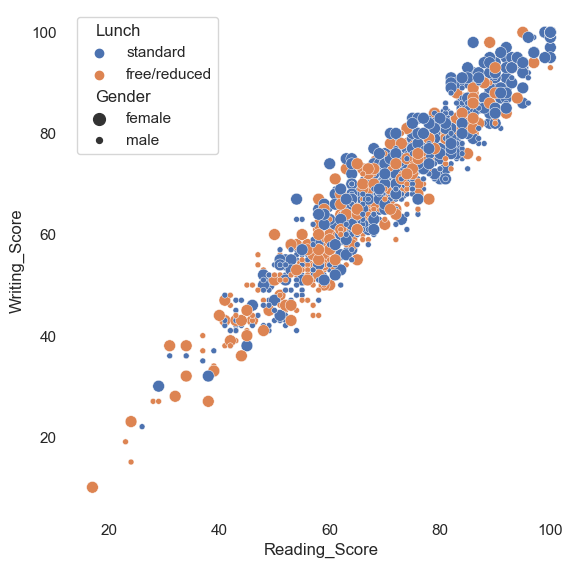

In [130]:
#okuma ve yazma notlarına göre öğle yemeği türüne ve cinsiyete göre renklendirilmiş ve boyutlandırılmış bir nokta bulutu
#gösteren bir scatter plot çizelim.
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Reading_Score", y="Writing_Score",
                hue="Lunch", size="Gender",data=data)
plt.show()

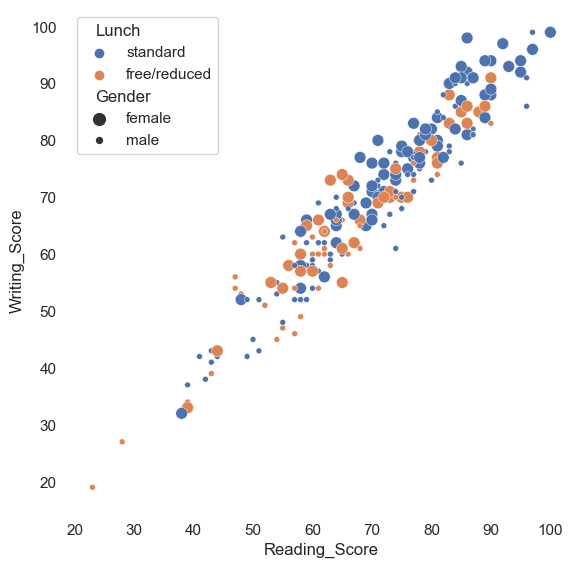

In [131]:
#"some college" ebeveyn eğitim seviyesine sahip öğrencilerin okuma puanı ile yazma puanı arasındaki ilişkiyi gösteren 
#nokta grafiğini çizelim.
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Reading_Score", y="Writing_Score",
                hue="Lunch", size="Gender",data=data[data['Parental_Level_of_Education']=="some college"])
plt.show()

In [132]:
#"Race/Ethnicity" sütununda "group A" ve "Parental_Level_of_Education" sütununda "some college" değerleri olan 
#öğrencilerin ilk 5 satırını alalım.
data[np.logical_and(data['Race/Ethnicity']=='group A',data['Parental_Level_of_Education']=='some college')].head()

Gender Race/Ethnicity Parental_Level_of_Education         Lunch  \
13     male        group A                some college      standard   
82     male        group A                some college  free/reduced   
88   female        group A                some college      standard   
300    male        group A                some college  free/reduced   
305    male        group A                some college      standard   

    Test_Preparation_Course  Math_Score  Reading_Score  Writing_Score  
13                completed          78             72             70  
82                completed          50             47             54  
88                     none          58             70             67  
300               completed          81             78             81  
305                    none          69             67             69

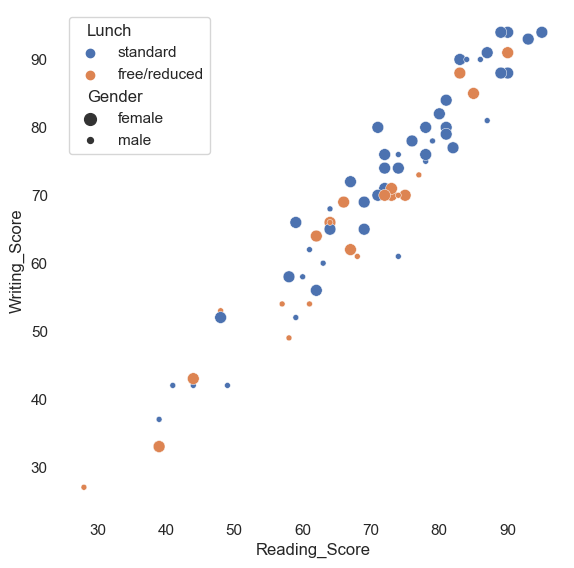

In [133]:
#"group C" ırk/etnik kökene sahip ve eğitim seviyesi "some college" olan öğrenciler için 
#okuma ve yazma notlarına göre yemek türü ve cinsiyete göre nokta grafiği çizelim.
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Reading_Score", y="Writing_Score",
                hue="Lunch", size="Gender",data=data[np.logical_and(data['Race/Ethnicity']=='group C',data['Parental_Level_of_Education']=='some college')])
plt.show()